In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io


%matplotlib inline

# Q1

## Part A

In [2]:
def cost(X,W,y):

  predicted = (np.dot(W.T,X).T)
  diff = y - predicted
  J = np.mean(np.square(diff),axis=0)/2
  
  return J

Here we are taking the cost to be $\sum(y - w^T X)^2/(2*m)$

## Part B

In [3]:
def get_data():
  
  X = np.random.rand(2,500) * 20 - 10
  epsi = np.random.normal(0,0.01,500)
  y = (3*X[0,:] + 4*X[1,:] + epsi)
  y = y.reshape(500,1)
  epsi = epsi.reshape(500,1)

  return X,y,epsi

In [4]:
def make_meshgrid(z,samples):
  
  w_0 = np.linspace(-z,z,samples)
  w_1 = np.linspace(-z,z,samples)
  w0,w1 = np.meshgrid(w_0,w_1)
  w_array = np.zeros([2,w_0.shape[0]*w_1.shape[0]])
  w_array[0,:] = w0.flatten()
  w_array[1,:] = w1.flatten()

  return w0,w1,w_array

In [5]:
def plot_contour(X,y,ax):

  w0,w1,w_array = make_meshgrid(10,50)
  J = cost(X,w_array,y).reshape(-1,1)
  J = J.reshape(w0.shape)

  ax.contour(w0,w1,J)

In [6]:
X,y,epsi = get_data()

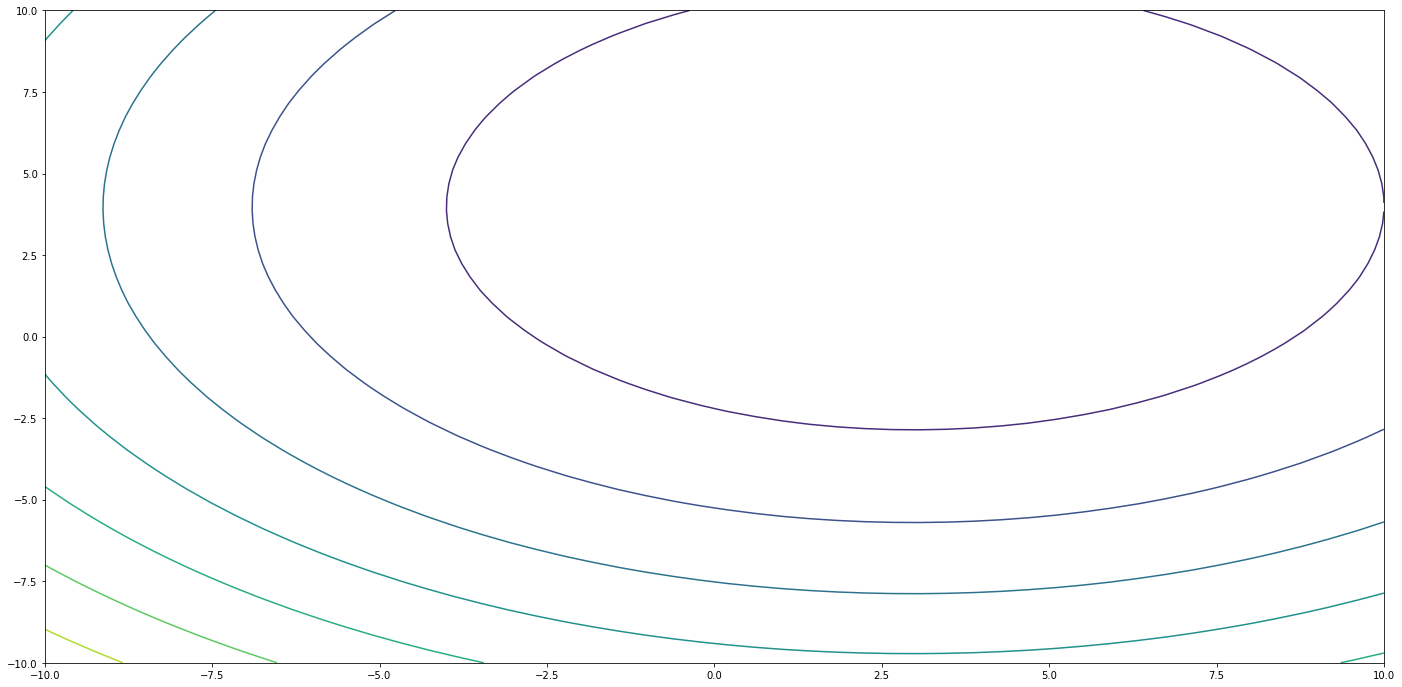

In [7]:
fig,ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(12)
plot_contour(X.copy(),y.copy(),ax)

The contour plot of our cost is concentric elipses with same major and minor axes

## Part C

In [8]:
def optimal_step(x):
  
  x12 = np.mean(np.square(x[0,:]))
  x22 = np.mean(np.square(x[0,:]))
  x1x2 = np.mean(np.multiply(x[0,:],x[1,:]))
  A = np.array([[x12,x1x2],[x1x2,x22]])
  w,v = np.linalg.eig(A)

  return 1/(np.max(w))

The hessian for our loss comes out to be $XX^T/m$ and so the optimal step size will be $1/\lambda_{max}	$ of the matrix



In [9]:
step = optimal_step(X.copy())
print("optimal step = ", step)

optimal step =  0.030562330331779155


## Part D

In [10]:
def gradient(W,X,y):

  predicted = (np.dot(W.T,X).T)
  diff = predicted - y
  grad = np.dot(X,diff)/diff.shape[0]
  
  return grad

In [11]:
def gradient_descent(W0,X,y,step):
  
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour(X,y,ax)
  W = W0
  plt.plot(W[0],W[1],'bo')
  epoch = 0

  while True:
    
    grad = gradient(W,X,y)
    plt.arrow(W[0][0]-step*grad[0][0]*0.01,W[1][0] -step*grad[1][0]*0.01 ,-step*grad[0][0]*0.9 ,-step*grad[1][0]*0.9,width=0.05,head_length = 0.15,length_includes_head = True,head_width = 0.15,ec = 'red',head_starts_at_zero = True)
    W = W - step*grad
    plt.plot(W[0],W[1],'bo')
    epoch = epoch + 1

    if epoch == 100 or abs(cost(X,W,y) - cost(X,W+step*grad,y)) < 0.00001:
      break
  
  print("number of epochs = " , epoch)
  print("convergence at W = ", W)
  plt.show()

  return W

I have taken the stopping condition for gradient descent to be $J^t - J^{t-1} < 0.0001$

number of epochs =  16
convergence at W =  [[2.99979264]
 [3.99985506]]


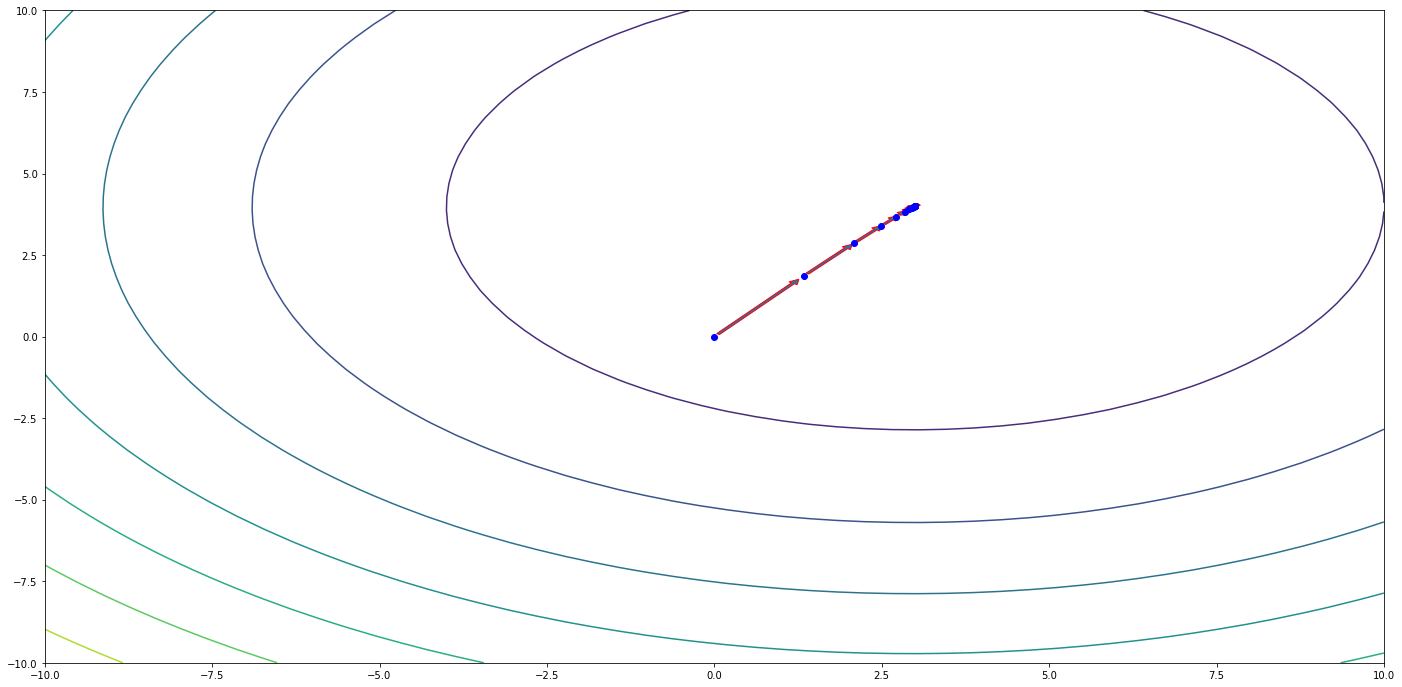

In [12]:
w = gradient_descent(np.array([0,0]).reshape(-1,1),X.copy(),y.copy(),step*0.9/2)

As we can see for $\eta = \eta_{opt} * 0.9/2$ , graident 
descent converges monotonically in every direection 

number of epochs =  8
convergence at W =  [[2.99996827]
 [4.0000038 ]]


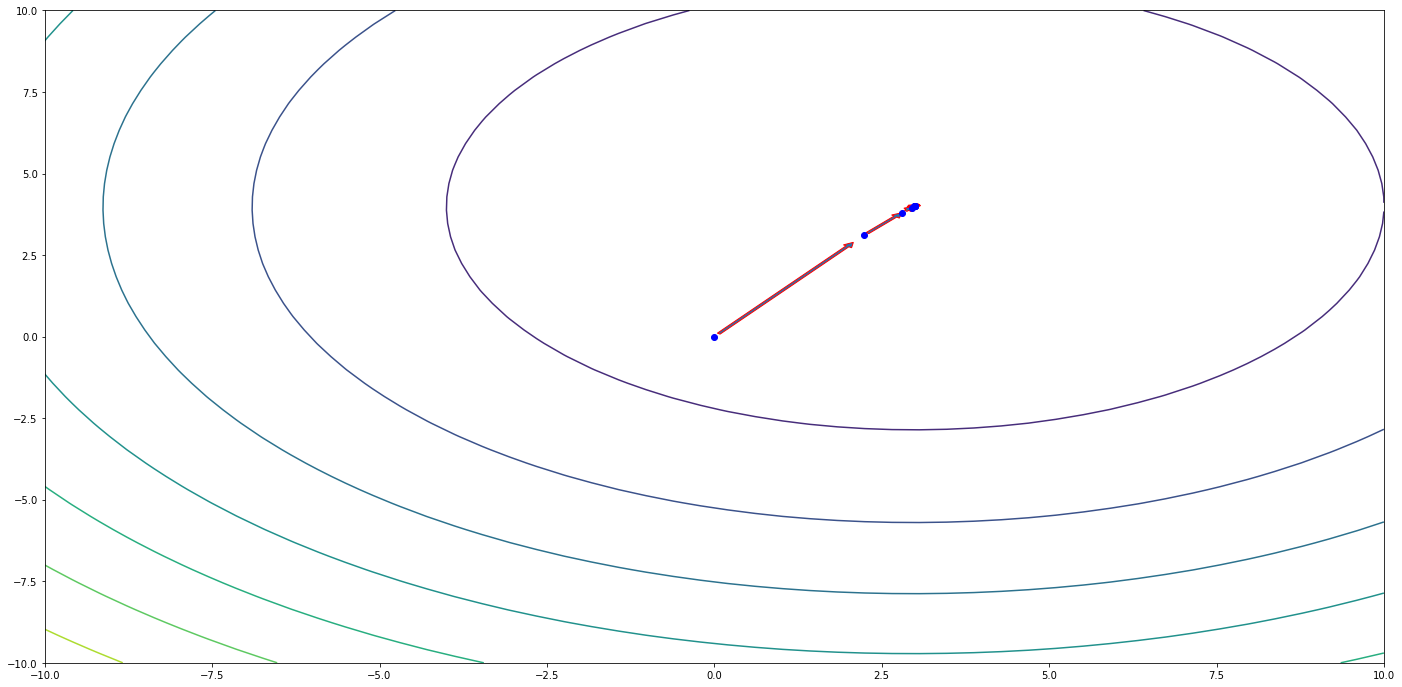

In [13]:
w = gradient_descent(np.array([0,0]).reshape(-1,1),X.copy(),y.copy(),step*1.5/2)

As we can see for $\eta = \eta_{opt} * 1.5/2$ , graident 
descent converges monotonically in every direection and the number of epochs required for convergence is lesser than when we used $\eta = \eta_{opt} * 0.9/2$ and hence training is completed fast

number of epochs =  4
convergence at W =  [[3.00002136]
 [4.00001974]]


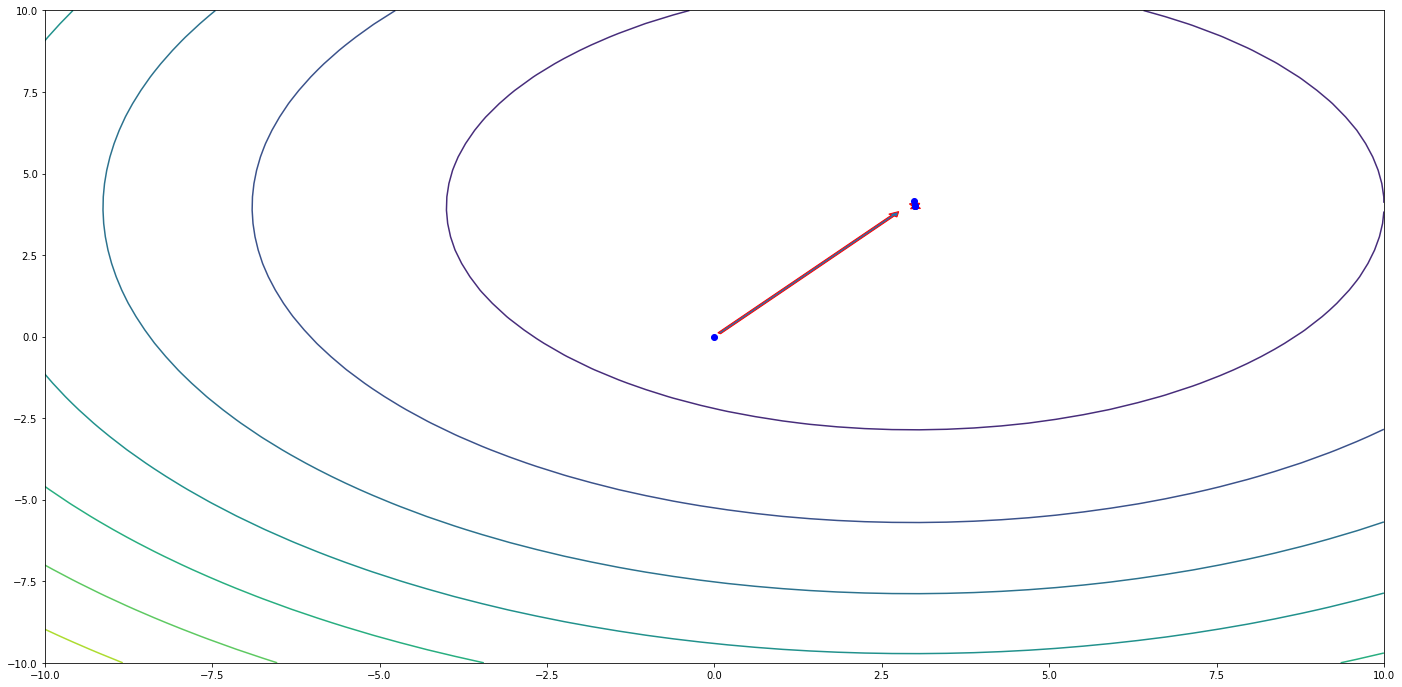

In [14]:
w = gradient_descent(np.array([0,0]).reshape(-1,1),X.copy(),y.copy(),step)

As we can see for $\eta = \eta_{opt}$ , graident 
descent converges monotonically in every direection and the number of epochs required for convergence is even lesser than when we used $\eta = \eta_{opt} * 1.5/2$ and hence the training is faster

number of epochs =  16
convergence at W =  [[3.00000268]
 [3.99968375]]


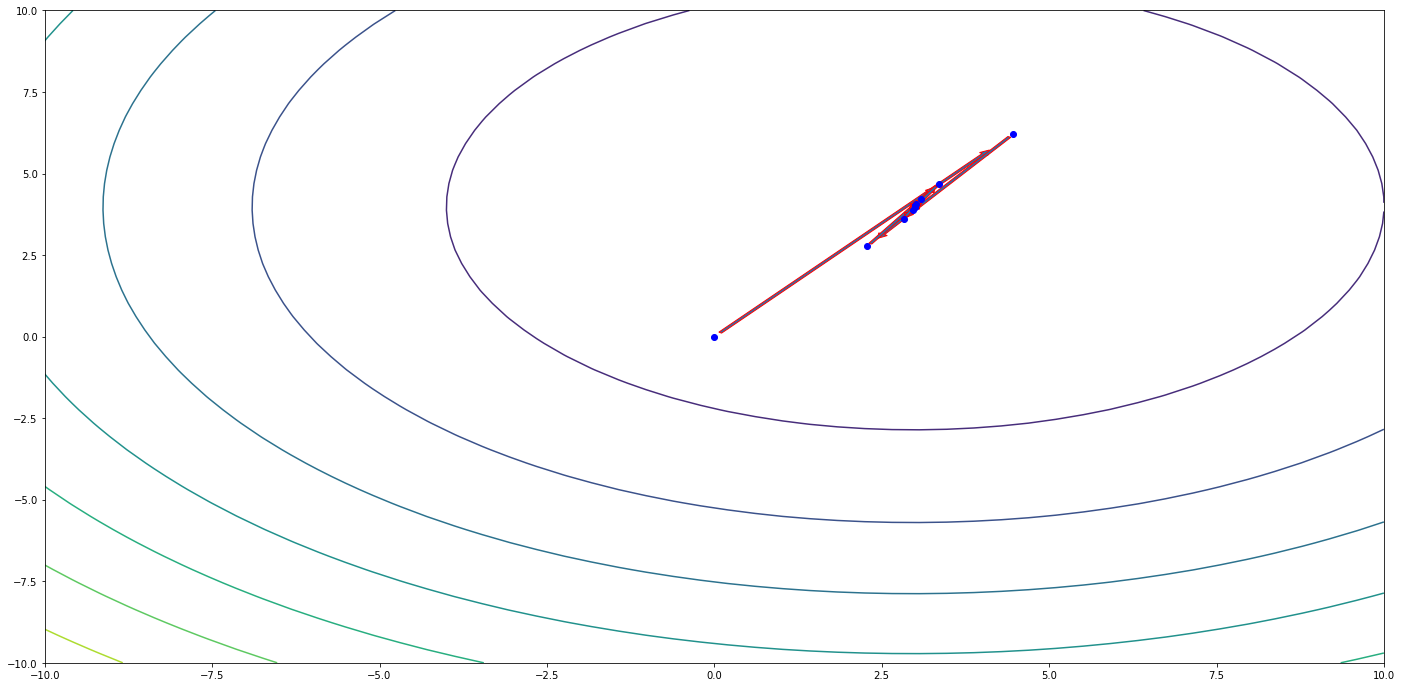

In [15]:
w = gradient_descent(np.array([0,0]).reshape(-1,1),X.copy(),y.copy(),step*1.5)

As we can see for $\eta = \eta_{opt} * 1.5$ , graident 
descent does not converge monotonically in every direection. As we can see gradient descent oscillates around the minima before converging.

# Q2

In [16]:
def rosenbrock_cost(x,y):

  return np.square(x) + 100*np.square(y - np.square(x))

In [17]:
def plot_contour_Q2(ax):

    w0,w1,w_array = make_meshgrid(5,50)
    J = rosenbrock_cost(w0,w1).reshape(w0.shape)

    cp = ax.contour(w0,w1,J,levels = [1000,5000,10000,20000])
    ax.clabel(cp,inline = True)

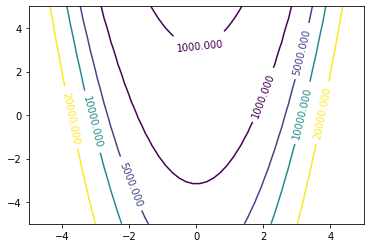

In [18]:
fig,ax = plt.subplots()
plot_contour_Q2(ax)

## Part A

In [19]:
def rosenbrock_gradient(x,y):

  dx = 2*x + 100*2*(-1)*(y - np.square(x)) * 2* x
  dy = 100*2*(y - np.square(x))

  return np.array([dx,dy])

In [20]:
def gradient_descent_Q2(x0,y0,step):

  x = x0
  y = y0
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour_Q2(ax)
  ax.plot(x,y,'bo')
  epoch = 0

  while True:
    grad = rosenbrock_gradient(x,y)
    ax.arrow(x,y,-step*grad[0]*0.9,-step*grad[1]*0.9,width=0.00005,head_width = 0.05,length_includes_head = True,head_length = 0.1,ec='red')
    x = x - step*grad[0]
    y = y - step*grad[1]
    ax.plot(x,y,'bo')
    epoch = epoch + 1

    if epoch == 200 or abs(rosenbrock_cost(x,y) - rosenbrock_cost(x+step*grad[0],y+step*grad[1])) < 0.0001:
      break
  
  plt.show()
  return epoch,x,y

In [21]:
np.random.seed(0)
x0 = np.random.rand()*10 - 5
y0 = np.random.rand()*10 - 5

print(x0,y0)

0.48813503927324753 2.151893663724195


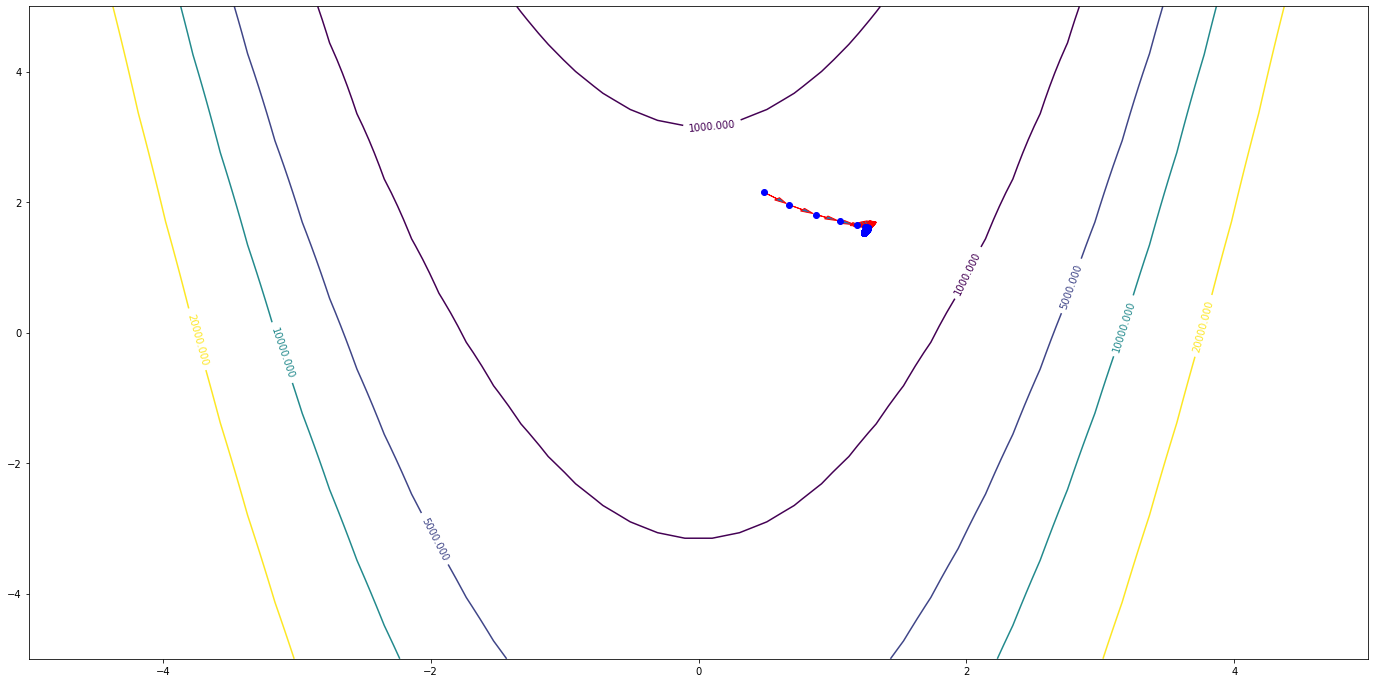

In [22]:
steps,x,y = gradient_descent_Q2(x0,y0,0.0005)

In [23]:
print("number of epochs = ", step , "x at convergence = ", x , "y at convergence = ", y)

number of epochs =  0.030562330331779155 x at convergence =  1.2339540487823586 y at convergence =  1.5269376306500508


Gradient descent for rosenbrock cost often gets stuck in local minimas

In [24]:
np.random.seed(100)
x0 = np.random.rand()*10 - 5
y0 = np.random.rand()*10 - 5

print(x0,y0)

0.43404941790965434 -2.2163061490620386


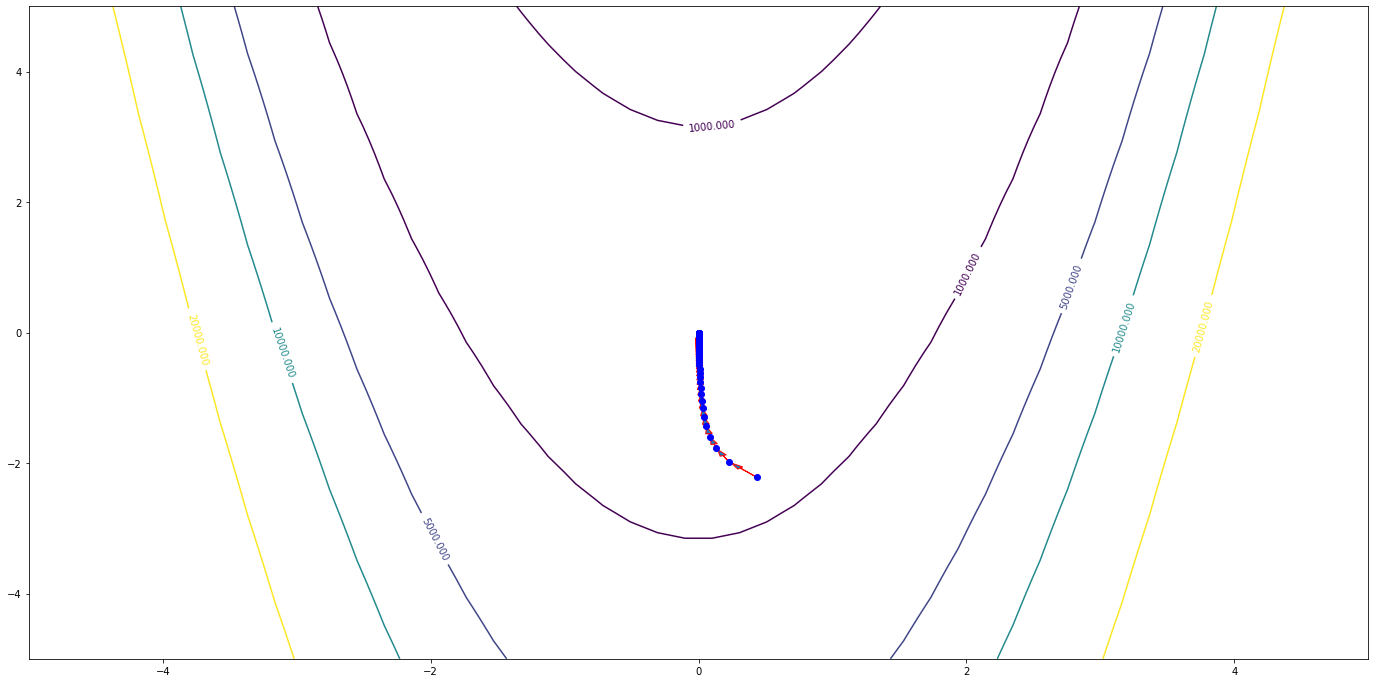

In [25]:
steps,x,y = gradient_descent_Q2(x0,y0,0.0005)

In [26]:
print("number of epochs = ", step , "x at convergence = ", x , "y at convergence = ", y)

number of epochs =  0.030562330331779155 x at convergence =  0.0024086423514781603 y at convergence =  -0.0018709966989291372


In this example gradient descent converges to optima . Thus as we can see from these 2 examples , whether graident descent converges or not depends on initialisation

## Part B

In [27]:
def pollyack_Q2(x0,y0,step,beta):

  x = x0
  y = y0
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour_Q2(ax)
  ax.plot(x,y,'bo')
  epoch = 0
  prev = np.array([0,0])

  while True:
    grad = rosenbrock_gradient(x,y)
    x_new = x - step*grad[0]
    y_new = y - step*grad[1]
    x_new = x_new - beta*prev[0]
    y_new = y_new - beta*prev[1]

    ax.arrow(x,y,(x_new-x)*0.9,(y_new-y)*0.9,width=0.00005,head_width = 0.05,length_includes_head = True,head_length = 0.1,ec='red')
    prev = np.array([x - x_new,y-y_new])

    ax.plot(x,y,'bo')
    epoch = epoch + 1

    if epoch == 200 or abs(rosenbrock_cost(x,y) - rosenbrock_cost(x_new,y_new)) < 0.0001:
      break
    
    x = x_new
    y = y_new
  
  plt.show()
  return epoch,x,y


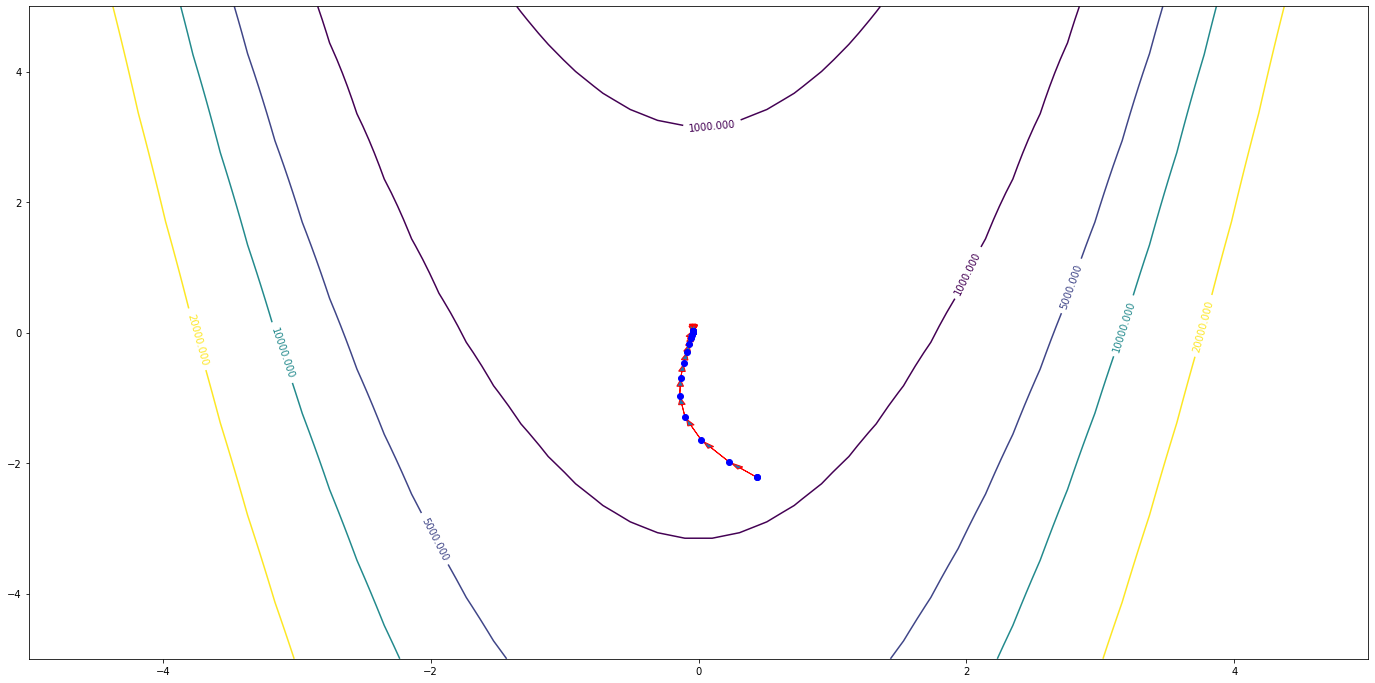

In [28]:
steps,x,y = pollyack_Q2(x0,y0,0.0005,0.55)

In [29]:
print("number of epochs = ", step , "x at convergence = ", x , "y at convergence = ", y)

number of epochs =  0.030562330331779155 x at convergence =  -0.040455529222086735 y at convergence =  0.0025394207476442773


pollyack's method converges faster than gradient descent as can be seen from the number of epochs taken for convergence. The beta parameter for pollyacks method needs to be tuned and 0.55 works best for this problem. It also does not get stuck in local minima if we choose the correct $\beta$

## Part C

In [30]:
def nestrov_Q2(x0,y0,step,beta):

  x = x0
  y = y0
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour_Q2(ax)
  ax.plot(x,y,'bo')
  epoch = 0
  prev = np.array([0,0])

  while True:

    x_new = x - beta*prev[0]
    y_new = y - beta*prev[1]
    grad = rosenbrock_gradient(x_new,y_new)
    x_new = x_new - step*grad[0]
    y_new = y_new - step*grad[1]
    # print(x_new,y_new)
    # print(prev.shape,prev)

    ax.arrow(x,y,(x_new-x)*0.9,(y_new-y)*0.9,width=0.00005,head_width = 0.05,length_includes_head = True,head_length = 0.1,ec='red')
    prev = np.array([x - x_new,y-y_new])

    ax.plot(x,y,'bo')
    epoch = epoch + 1

    if epoch == 200 or abs(rosenbrock_cost(x,y) - rosenbrock_cost(x_new,y_new)) < 0.0001:
      break
    

    x = x_new
    y = y_new
  
  plt.show()
  return epoch,x,y


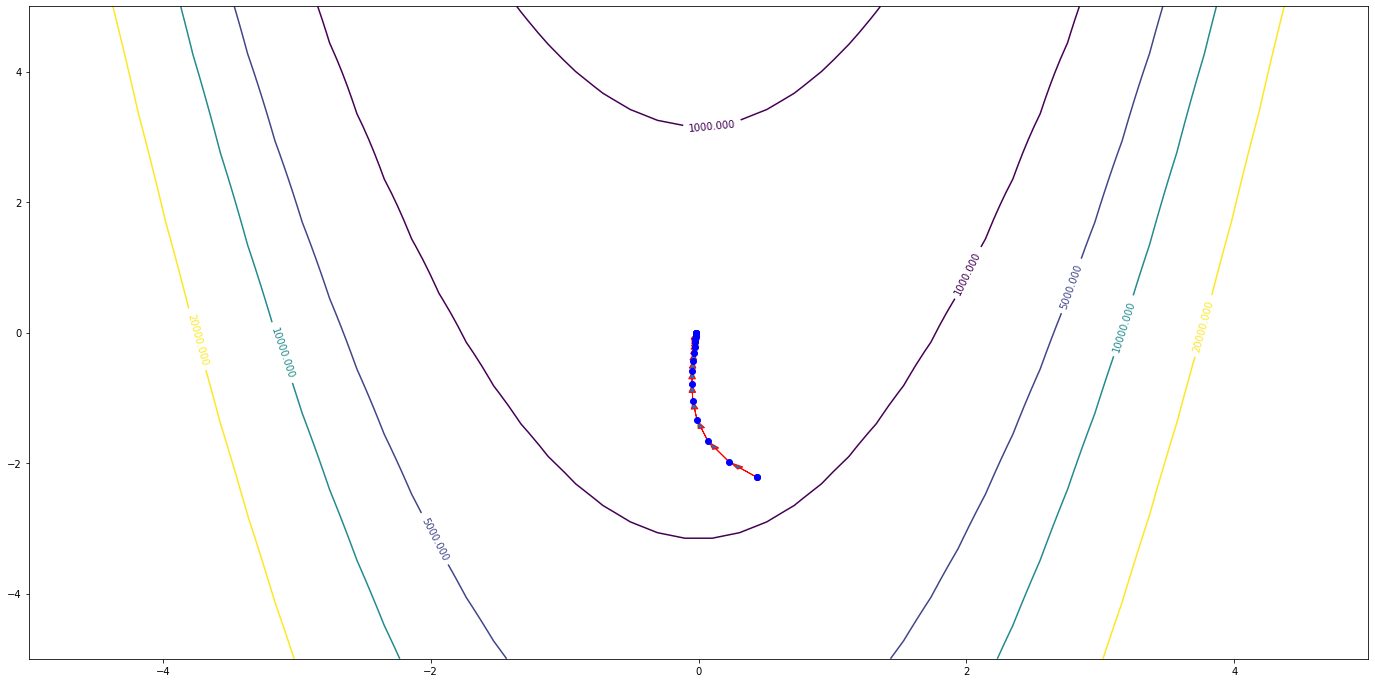

In [31]:
steps,x,y = nestrov_Q2(x0,y0,0.0005,0.55)

In [32]:
print("number of epochs = ", step , "x at convergence = ", x , "y at convergence = ", y)

number of epochs =  0.030562330331779155 x at convergence =  -0.01807971193544884 y at convergence =  0.00011976251553523338


As we can see , nestrov's method also converges faster than gradient descent and also faster than pollyacks method . It also does not get stuck in local minima if we choose the correct $\beta$

## Part D

In [33]:
def adam_Q2(x0,y0,step,delta,gamma,epsi):

  x = x0
  y = y0
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour_Q2(ax)
  ax.plot(x,y,'bo')
  epoch = 0
  prev_m = np.array([0,0])
  prev_v = np.array([0,0])

  while True:

    grad = rosenbrock_gradient(x,y)
    m = prev_m*delta + (1-delta)*grad
    v = prev_v*gamma + (1-gamma)*np.square(grad)

    m1 = m/(1 - delta**(epoch+1))
    v1 = v/(1 - gamma**(epoch+1))
    v1 = np.sqrt(v1 + epsi)
    x_new = x - step*m1[0]/v1[0]
    y_new = y - step*m1[1]/v1[1]

    ax.arrow(x,y,(x_new-x)*0.9,(y_new-y)*0.9,width=0.00005,head_width = 0.05,length_includes_head = True,head_length = 0.1,ec='red')
    prev_m = m
    prev_v = v

    ax.plot(x,y,'bo')
    epoch = epoch + 1

    if epoch == 2000 or abs(rosenbrock_cost(x,y) - rosenbrock_cost(x_new,y_new)) < 0.0001:
      break
  
    x = x_new
    y = y_new


  plt.show()
  return epoch,x,y


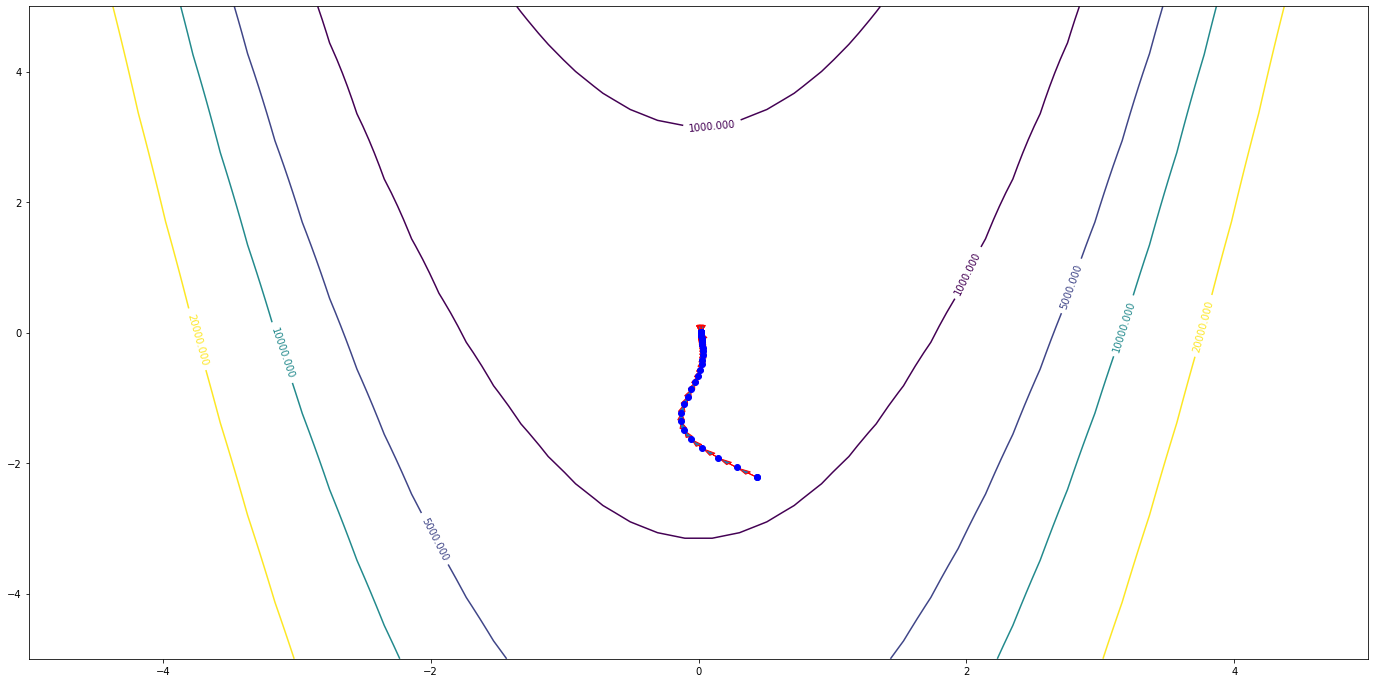

In [34]:
steps,x,y = adam_Q2(x0,y0,0.15,0.7,0.999,0.1)

In [35]:
print(steps,x,y)

45 0.015034914715315269 0.0008687761432007287


Adams method is also faster than gradient descent and it does not get stuck in local optima if we choose correct $\delta$ and $\gamma$

# Q3

In [36]:
def cost_Q3(x,y):

  z = np.square(x) + np.square(y)
  J = 50*(z**3)/9 - 209*(z**2)/18 + 50*z/9

  return J

In [37]:
def plot_contour_Q3(ax):

  w0,w1,w_array = make_meshgrid(5,50)
  J = cost_Q3(w0,w1).reshape(w0.shape)

  cp = ax.contour(w0,w1,J,levels = [10,200,1000,5000,10000,20000,50000])
  ax.clabel(cp,inline = True)

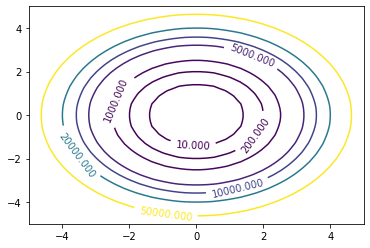

In [38]:
fig,ax = plt.subplots()
plot_contour_Q3(ax)

In [39]:
np.random.seed(1)
x0 = np.random.rand()*10 - 5
y0 = np.random.rand()*10 - 5

print(x0,y0)

-0.8297799529742598 2.2032449344215808


## Part A

In [40]:
def gradient_Q3(x,y):
  
  z = np.square(x) + np.square(y)
  dx = 100*x*z*z/3 - 209*2*x*z/9 + 59*2*x
  dy = 100*y*z*z/3 - 209*2*y*z/9 + 59*2*y

  return np.array([dx,dy])

In [41]:
def gradient_descent_Q3(x0,y0,step):

  x = x0
  y = y0
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour_Q3(ax)
  ax.plot(x,y,'bo')
  epoch = 0

  while True:
    grad = gradient_Q3(x,y)
    ax.arrow(x,y,-step*grad[0]*0.9,-step*grad[1]*0.9,width=0.00005,head_width = 0.05,length_includes_head = True,head_length = 0.1,ec='red')
    x = x - step*grad[0]
    y = y - step*grad[1]
    ax.plot(x,y,'bo')
    epoch = epoch + 1

    if epoch == 200 or abs(cost_Q3(x,y) - cost_Q3(x+step*grad[0],y+step*grad[1])) < 0.0001:
      break
  
  plt.show()
  return epoch,x,y

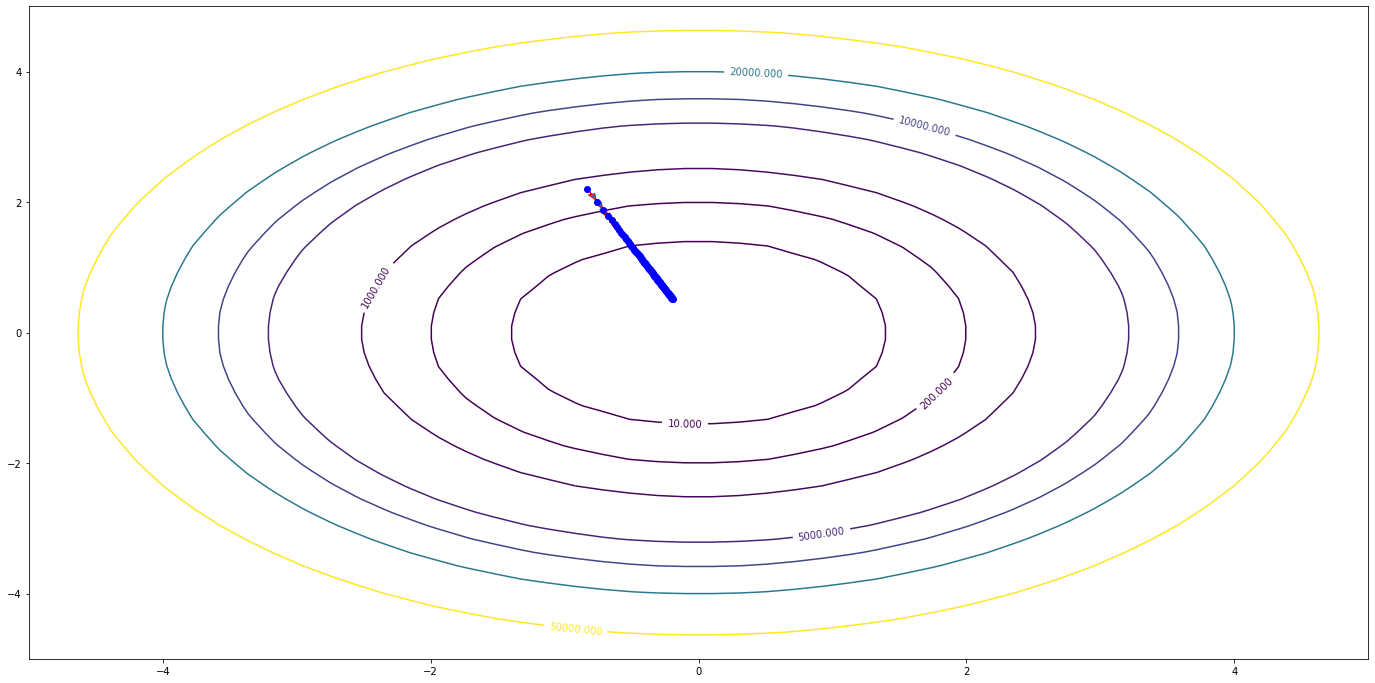

In [42]:
steps,x,y = gradient_descent_Q3(x0,y0,0.0001)

In [43]:
print(steps,x,y)

101 -0.19390963596267172 0.5148719508574856


As we can clearly see , gradient descent does not converge to global optima and gets stuck in local minima

## Part B

In [44]:
def pollyack_Q3(x0,y0,step,beta):

  x = x0
  y = y0
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour_Q3(ax)
  ax.plot(x,y,'bo')
  epoch = 0
  prev = np.array([0,0])

  while True:
    grad = gradient_Q3(x,y)
    x_new = x - step*grad[0]
    y_new = y - step*grad[1]
    # print(x_new,y_new)
    # print(prev.shape,prev)
    x_new = x_new - beta*prev[0]
    y_new = y_new - beta*prev[1]

    ax.arrow(x,y,(x_new-x)*0.9,(y_new-y)*0.9,width=0.00005,head_width = 0.05,length_includes_head = True,head_length = 0.1,ec='red')
    prev = np.array([x - x_new,y-y_new])

    ax.plot(x,y,'bo')
    epoch = epoch + 1

    if epoch == 200 or abs(rosenbrock_cost(x,y) - rosenbrock_cost(x_new,y_new)) < 0.0001:
      break

    x = x_new
    y = y_new
  
  plt.show()
  return epoch,x,y


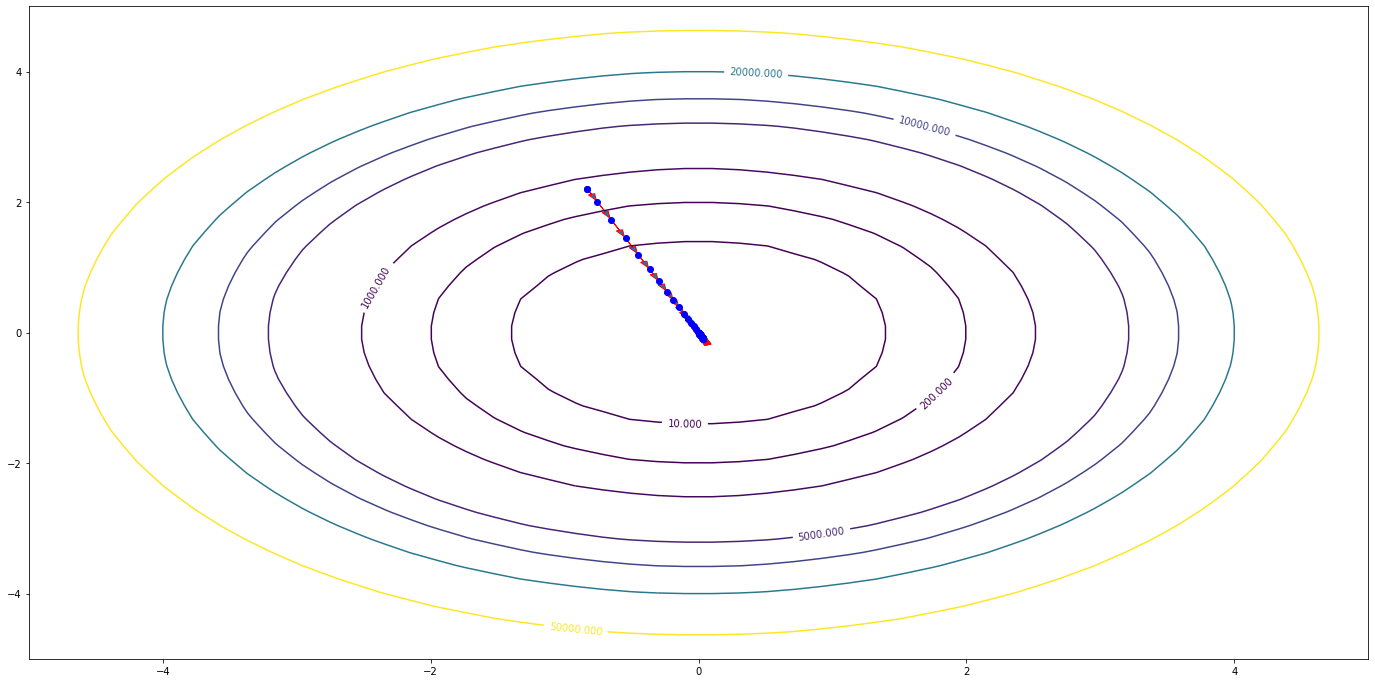

In [45]:
steps,x,y = pollyack_Q3(x0,y0,0.0001,0.8)

In [46]:
print(steps,x,y)

72 0.0008182758375367401 -0.002172699024060809


When we use pollyacks momentum method , it does not get stuck in local optima and it converges to global optima

## Part C

In [47]:
def nestrov_Q3(x0,y0,step,beta):

  x = x0
  y = y0
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour_Q3(ax)
  ax.plot(x,y,'bo')
  epoch = 0
  prev = np.array([0,0])

  while True:

    x_new = x - beta*prev[0]
    y_new = y - beta*prev[1]
    grad = gradient_Q3(x_new,y_new)
    x_new = x_new - step*grad[0]
    y_new = y_new - step*grad[1]
    # print(x_new,y_new)
    # print(prev.shape,prev)

    ax.arrow(x,y,(x_new-x)*0.9,(y_new-y)*0.9,width=0.00005,head_width = 0.05,length_includes_head = True,head_length = 0.1,ec='red')
    prev = np.array([x - x_new,y-y_new])

    ax.plot(x,y,'bo')
    epoch = epoch + 1

    if epoch == 200 or abs(rosenbrock_cost(x,y) - rosenbrock_cost(x_new,y_new)) < 0.0001:
      break

    x = x_new
    y = y_new
  
  plt.show()
  return epoch,x,y


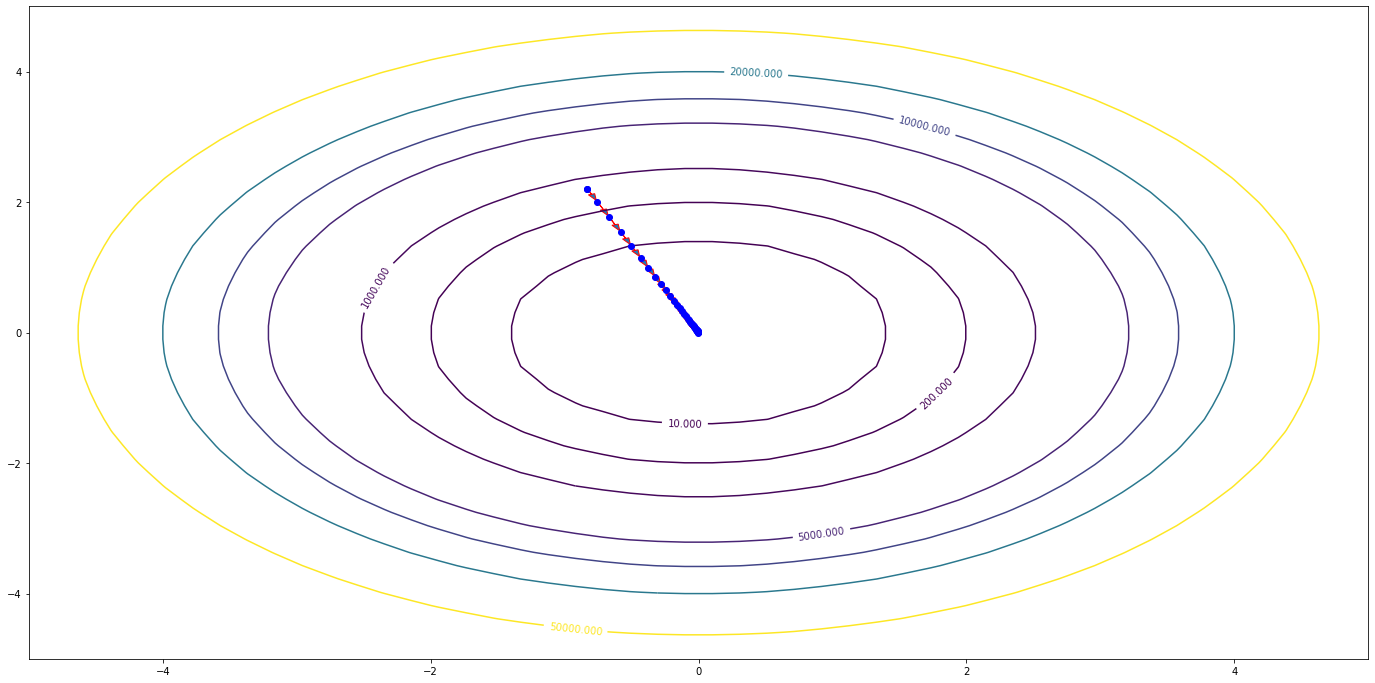

In [48]:
steps,x,y = nestrov_Q3(x0,y0,0.0001,0.8)

In [49]:
print(steps,x,y)

55 -0.0007542348040618974 0.0020026562529709907


When we use nestrov momentum method , it does not get stuck in local optima and it converges to global optima . It also converges faster than pollyacks method

## Part D

In [50]:
def adam_Q3(x0,y0,step,delta,gamma,epsi):

  x = x0
  y = y0
  fig,ax = plt.subplots()
  fig.set_figwidth(24)
  fig.set_figheight(12)
  plot_contour_Q3(ax)
  ax.plot(x,y,'bo')
  epoch = 0
  prev_m = np.array([0,0])
  prev_v = np.array([0,0])

  while True:

    grad = gradient_Q3(x,y)
    m = prev_m*delta + (1-delta)*grad
    v = prev_v*gamma + (1-gamma)*np.square(grad)

    m1 = m/(1 - delta**(epoch+1))
    v1 = v/(1 - gamma**(epoch+1))
    v1 = np.sqrt(v1 + epsi)
    x_new = x - step*m1[0]/v1[0]
    y_new = y - step*m1[1]/v1[1]

    ax.arrow(x,y,(x_new-x)*0.9,(y_new-y)*0.9,width=0.00005,head_width = 0.05,length_includes_head = True,head_length = 0.1,ec='red')
    prev_m = m
    prev_v = v

    ax.plot(x,y,'bo')
    epoch = epoch + 1

    if epoch == 2000 or abs(cost_Q3(x,y) - cost_Q3(x_new,y_new)) < 0.0001:
      break
  
    x = x_new
    y = y_new


  plt.show()
  return epoch,x,y


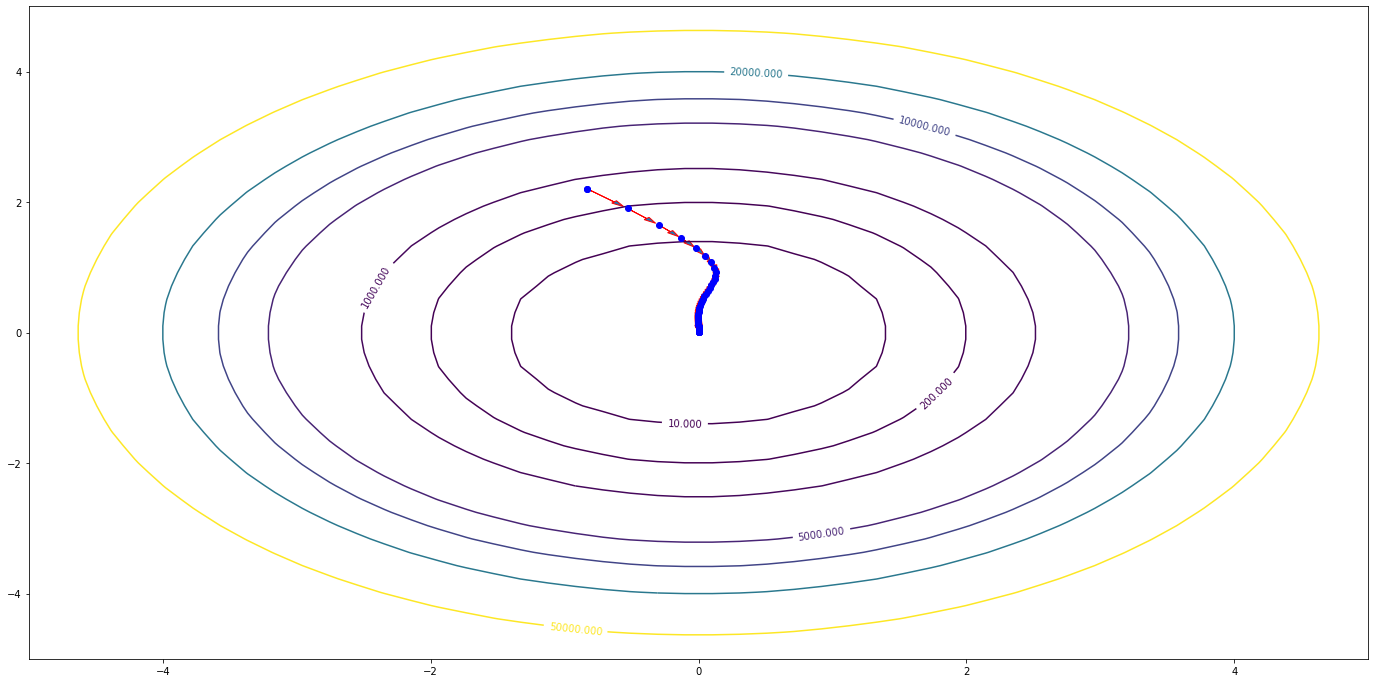

In [51]:
steps,x,y = adam_Q3(x0,y0,0.3,0.6,0.99,0.01)

In [52]:
print(steps,x,y)

51 -7.0352040914483e-06 0.006048533966063354


When we use adam optimiser , it will not get stuck in local optima and converges to global minima . However unlike Nestrov and pollyack's methods it does not approach global optima in a straight line rather it takes a curved path

# Q4

## Part A

In [53]:
def get_dataset():

  X = np.array([[0.28,1.31,-6.2],[0.07,0.58,-0.78],[1.54,2.01,-1.63],[-0.44,1.18,-4.32],[-0.81,0.21,5.73],[1.52,3.16,2.77],[2.20,2.42,-0.19],[0.91,1.94,6.21],[0.65,1.93,4.38],[-0.26,0.82,-0.96],[0.011,1.03,-0.21],[1.27,1.28,0.08],[0.13,3.12,0.16],[-0.21,1.23,-0.11],[-2.18,1.39,-0.19],[0.34,1.96,-0.16],[-1.38,0.94,0.45],[-0.12,0.82,0.17],[-1.44,2.31,0.14],[0.26,1.94,0.08]])
  y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]).reshape(-1,1)

  return X,y

In [54]:
def initialise_weights(input_layer,hidden_layer,output_layer):

  np.random.seed(0)
  w0 = np.random.randn(hidden_layer,input_layer)
  w1 = np.random.randn(output_layer,hidden_layer)
  b0 = np.random.randn(hidden_layer,1)
  b1 = np.random.randn(output_layer,1)

  return w0,w1,b0,b1

In [55]:
def sigmoid(z):

  return 1/(1 + np.exp(-z))

In [56]:
def sigmoid_gradient(z):
  
  x = sigmoid(z)
  return x * (1 - x)

In [57]:
def logistic_loss(y,p):

  m = y.shape[1]
  sum = np.sum(np.dot(y,np.log(p).T) + np.dot(1-y,np.log(1-p).T))
  return -1*sum/m

In [58]:
def logistic_gradient(y,p):

  return -1 * np.divide(y,p) + np.divide(1-y,1-p)

In [59]:
def forward(a,w,b):

  z = np.dot(w,a) + b
  a = sigmoid(z)
  return a,z

In [60]:
def forward_pass(X,w0,w1,b0,b1):

  a1,z1 = forward(X,w0,b0)
  p,z2 = forward(a1,w1,b1)
  return z1,a1,z2,p

In [61]:
def backward(dy,w,b,z,a):

  m = a.shape[1]
  dz = dy*sigmoid_gradient(z)
  dw = np.dot(dz,a.T)/m
  db = np.sum(dz,axis=1,keepdims=True)/m
  da = np.dot(w.T,dz)

  return da,dw,db

In [62]:
def backward_pass(dy,X,w0,w1,b0,b1,z1,z2,a1,y,p):

  da1,dw1,db1 = backward(dy,w1,b1,z2,a1)
  dx,dw0,db0 = backward(da1,w0,b0,z1,X)

  return dw1,dw0,db1,db0

In [63]:
def update(w1,w0,b1,b0,dw1,dw0,db1,db0,step):

  w1 = w1 - step*dw1
  w0 = w0 - step*dw0
  b1 = b1 - step*db1
  b0 = b0 - step*db0

  return w1,w0,b1,b0

In [64]:
def predict_Q4(X,w0,w1,b0,b1):

  z1,a1,z2,p = forward_pass(X,w0,w1,b0,b1)
  p[p>0.5] = 1
  p[p<=0.5] = 0

  return p

In [65]:
def accuracy_Q4(p,y):

  y = y.reshape(p.shape)
  return (np.sum(y==p)/y.shape[1])*100

In [66]:
def get_dy_Q4(y,p):

  y = y.reshape(p.shape)
  dy = logistic_gradient(y,p)
  return dy

In [67]:
def train_Q4(X,y,w0,w1,b0,b1,step):

  loss_hist = []
  prev_loss = 1000000000000
  for i in range(10000):
    z1,a1,z2,p = forward_pass(X,w0,w1,b0,b1)
    loss = logistic_loss(y,p)
    loss_hist.append(loss)
    # print(logistic_loss(y,p))
    dy = get_dy_Q4(y.copy(),p)
    dw1,dw0,db1,db0 = backward_pass(dy,X,w0,w1,b0,b1,z1,z2,a1,y,p)
    w11,w01,b11,b01 = update(w1,w0,b1,b0,dw1,dw0,db1,db0,step)

    if (np.max(np.abs(w11-w1)) < 0.001 and np.max(np.abs(w01-w0)) < 0.001 and np.max(np.abs(b11-b1)) < 0.001 and np.max(np.abs(b01 - b0)) < 0.001) or abs(prev_loss - loss) < 0.00001:
      break

    prev_loss = loss
    w1 = w11
    w0 = w01
    b1 = b11
    b01 = b01

  loss_hist = np.array(loss_hist)
  return w0,w1,b0,b1,loss_hist,i

In [68]:
X,y = get_dataset()
print(X.shape,y.shape)

(20, 3) (20, 1)


In [69]:
w0,w1,b0,b1 = initialise_weights(3,5,1)
print(w0.shape,w1.shape,b0.shape,b1.shape)

(5, 3) (1, 5) (5, 1) (1, 1)


In [70]:
w0,w1,b0,b1,loss_hist,epoch = train_Q4(X.T,y.T,w0,w1,b0,b1,step=0.1)

In [71]:
p = predict_Q4(X.T,w0,w1,b0,b1)

In [72]:
acc = accuracy_Q4(p,y)

In [73]:
print(acc)

100.0


In [74]:
print(loss_hist[0])

0.8458591950674152


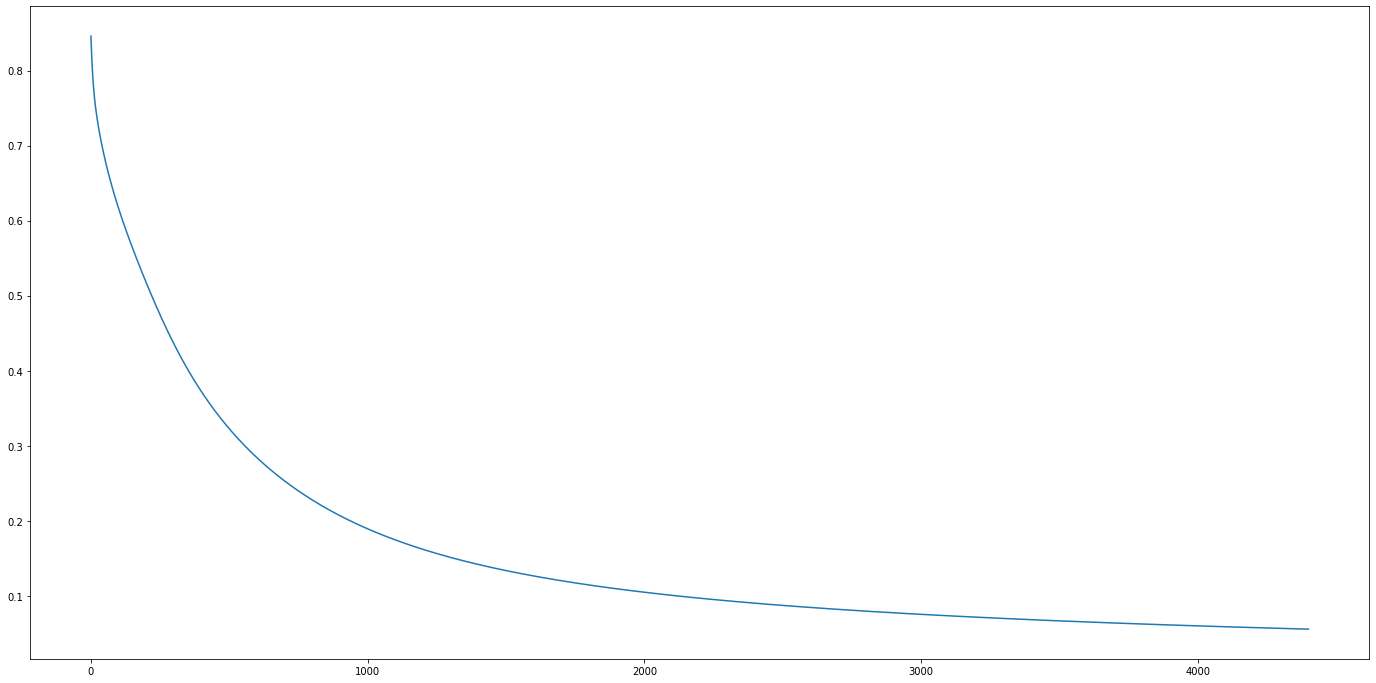

In [75]:
fig,ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(12)
ax.plot(np.arange(loss_hist.shape[0]),loss_hist)

In [76]:
print(epoch)

4399


When we initialise weights randomly , our network achieves 100% accuracy

## Part B

In [77]:
def initialise_weights1():

  np.random.seed(0)
  w0 = np.ones((5,3))*0.5
  w1 = np.ones((1,5))*-1*0.5
  b0 = np.ones((5,1))*0.5
  b1 = np.ones((1,1))*-1*0.5
  return w0,w1,b0,b1

In [78]:
X,y = get_dataset()
print(X.shape,y.shape)

(20, 3) (20, 1)


In [79]:
w0,w1,b0,b1 = initialise_weights1()
print(w0.shape,w1.shape,b0.shape,b1.shape)

(5, 3) (1, 5) (5, 1) (1, 1)


In [80]:
w0,w1,b0,b1,loss_hist,epoch = train_Q4(X.T,y.T,w0,w1,b0,b1,step=0.1)

In [81]:
p = predict_Q4(X.T,w0,w1,b0,b1)

In [82]:
acc = accuracy_Q4(p,y)

In [83]:
print(acc)

45.0


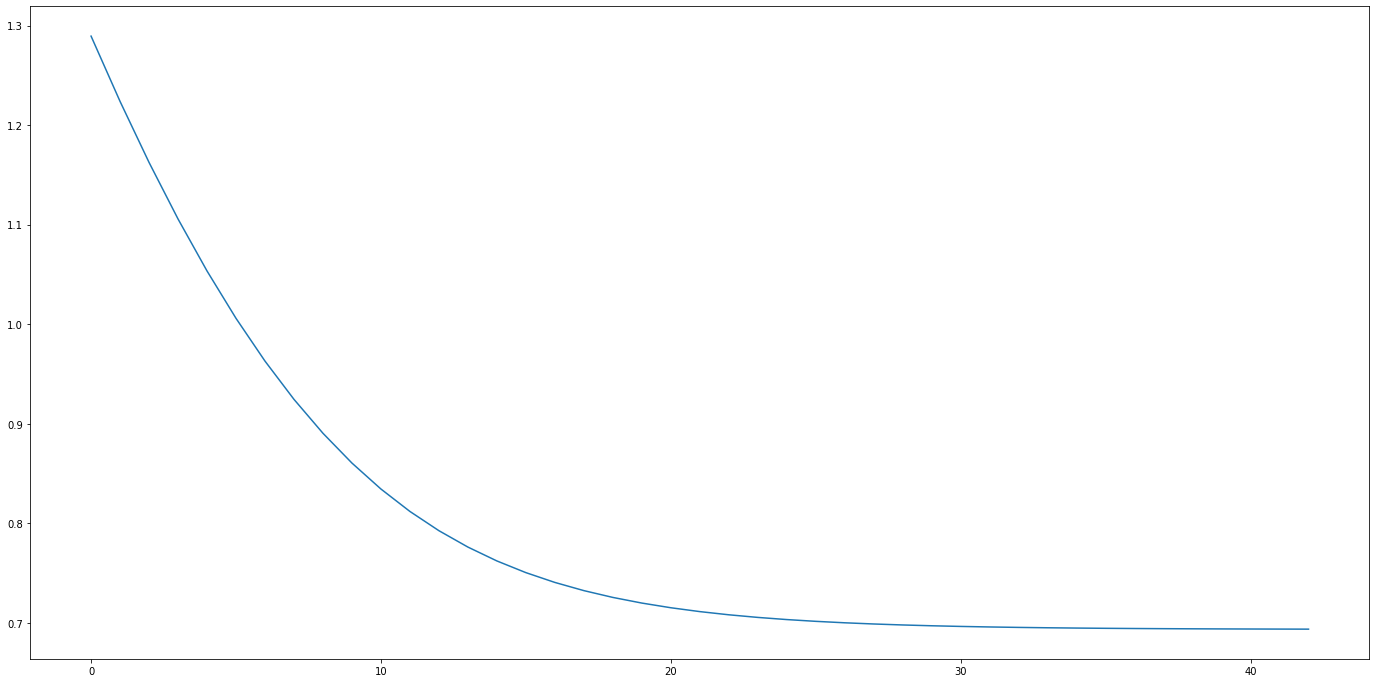

In [84]:
fig,ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(12)
ax.plot(np.arange(loss_hist.shape[0]),loss_hist)

When we initialise all weights between 2 layers by the same constant , our network cannot achieve 100% accuracy and it gets only 45% accuracy . 

## Part C

When we initialise all weights between 2 layerssay between iniput and hidden layer by the same constant , the gradient for all those weights will also be same this is because $  z = w^Tx + b$ , and now as $w$ is one matrix, all the neurons will learn the same thing which in turn will cause the gradients to be equal . This means that the weights between those 2 layers will always be the same . Thus all neurons in a hidden layer will learn the same thing and thus our network will perform poorly

# Q5 

In [85]:
def relu(z):

  return np.maximum(z,0)

In [86]:
def relu_gradient(z):

  x = np.ones(z.shape)
  x[z<=0] = 0
  x[z>0] = 1
  return x

In [87]:
def tanh(z):

  x = sigmoid(2*z) 
  return 2*x - 1

In [88]:
def tanh_gradient(z):

  x = tanh(z)
  return 1 - np.square(x)

In [89]:
def MSE(p,y):

  m = y.shape[0]
  p = p.reshape(y.shape)
  x = np.sum((np.square(p-y)))/(2*m)
  return x

Please upload winequality-white.csv before running the cell below

In [90]:
df = pd.read_csv("winequality-white.csv",sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [91]:
data = df.to_numpy()
np.random.seed(10)
np.random.shuffle(data)

rows = data.shape[0]
colums = data.shape[1]
train_size = int(rows * 0.7)

data_train = data[:train_size,:]
data_test = data[train_size:,:]

X_train = data_train[:,:-1]
X_test = data_test[:,:-1]
y_train = data_train[:,-1]
y_test = data_test[:,-1]

X_norm = np.linalg.norm(X_train,axis=0)
X_mean = np.mean(X_train,axis=0)


num_classes = np.unique(y_test).shape[0]
print(X_train.shape,y_train.shape)

(3428, 11) (3428,)


In [92]:
def predict(X_train,w1,w0,b1,b0,activation = 'R'):
  
  z1 = np.dot(w0,X_train) + b0
  a1 = relu(z1)
  # print(z1)
  if activation == 'T':
    a1 = tanh(z1)

  z2 = np.dot(w1,a1) + b1

  return np.array(z2)

## Part A Backpropagation

In [93]:
def forward_Q5(x,w0,w1,b0,b1,activation = 'R'):

  z1 = np.dot(w0,x) + b0
  a1 = relu(z1)
  if activation == 'T':
    a1 = tanh(z1)
  z2 = np.dot(w1,a1) + b1

  return z1,a1,z2

In [94]:
def backward_Q5(z2,a1,z1,w1,x,y,activation='R'):
  
  dw1 = (z2 - y)*a1.T
  db1 = (z2 - y)
  da1 = (z2 - y)*w1.T

  dw0 = np.dot(da1,x.T)*relu_gradient(z1)
  db0 = da1*relu_gradient(z1)

  if activation == 'T':
    dw0 = -np.dot(da1,x.T)*tanh_gradient(z1)
    db0 = -da1*tanh_gradient(z1)

  return dw1,dw0,db1,db0

In [95]:
def train(X_train,y_train,step,hidden_layer,epoch,activation = 'R'):
  
  w0,w1,b0,b1 = initialise_weights(X_train.shape[0],hidden_layer,1)
  w0 = w0*0.01
  w1 = w1*0.01
  b0 = b0*0.01
  b1 = b1*0.01

  p1 = predict(X_train,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)

  m = X_train.shape[1]
  loss_hist = []

  loss_hist.append(l1)

  for i in range(epoch):
    dw1 = np.zeros(w1.shape)
    dw0 = np.zeros(w0.shape)
    db1 = np.zeros(b1.shape)
    db0 = np.zeros(b0.shape)
    loss = 0
    for j in range(m):
      
      x = X_train[:,j].reshape(-1,1)
      y = y_train[j]

      z1,a1,z2 = forward_Q5(x,w0,w1,b0,b1,activation)
      loss_j = np.square(np.squeeze(z2) - y)/2
      loss = loss + loss_j

      dw1_j,dw0_j,db1_j,db0_j = backward_Q5(z2,a1,z1,w1,x,y,activation)
      dw1 = dw1 + dw1_j
      dw0 = dw0 + dw0_j
      db1 = db1 + db1_j
      db0 = db0 + db0_j


    if i%15 == 0:
      print("at epoch = ",i+1 ,"loss = " , loss/m)
    
    loss_hist.append(loss/m)

    w1 = w1 - dw1*0.5*step/m
    w0 = w0 - dw0*0.5*step/m
    b1 = b1 - db1*0.5*step/m
    b0 = b0 - db0*0.5*step/m
  
  return w1,w0,b1,b0,np.array(loss_hist)

In [96]:
def compare(X_train,y_train,X_test,y_test):

  table = []
  
  print("activation = tanh , layers = 25")
  w1,w0,b1,b0,loss_hist_t25 = train(X_train.T,y_train.copy().T,0.005,25,100,'T')  
  p1 = predict(X_train.T,w1,w0,b1,b0,'T')
  p2 = predict(X_test.T,w1,w0,b1,b0,'T')
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  print("activation = tanh , layers = 50")
  w1,w0,b1,b0,loss_hist_t50 = train(X_train.T,y_train.T,0.005,50,100,'T')
  p1 = predict(X_train.T,w1,w0,b1,b0,'T')
  p2 = predict(X_test.T,w1,w0,b1,b0,'T')
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  print("activation = tanh , layers = 75")
  w1,w0,b1,b0,loss_hist_t75 = train(X_train.T,y_train.T,0.005,75,100,'T')
  p1 = predict(X_train.T,w1,w0,b1,b0,'T')
  p2 = predict(X_test.T,w1,w0,b1,b0,'T')
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  print("activation = relu , layers = 25")
  w1,w0,b1,b0,loss_hist_r25 = train(X_train.T,y_train.T,0.001,25,100,'R')
  p1 = predict(X_train.T,w1,w0,b1,b0,'R')
  p2 = predict(X_test.T,w1,w0,b1,b0,'R')
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  print("activation = relu , layers = 50")
  w1,w0,b1,b0,loss_hist_r50 = train(X_train.T,y_train.T,0.001,50,100,'R')
  p1 = predict(X_train.T,w1,w0,b1,b0,'R')
  p2 = predict(X_test.T,w1,w0,b1,b0,'R')
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  print("activation = relu , layers = 75")
  w1,w0,b1,b0,loss_hist_r75 = train(X_train.T,y_train.T,0.001,75,100,'R')
  p1 = predict(X_train.T,w1,w0,b1,b0,'R')
  p2 = predict(X_test.T,w1,w0,b1,b0,'R')
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  return table,loss_hist_t25,loss_hist_t50,loss_hist_t75,loss_hist_r25,loss_hist_r50,loss_hist_r75

In [97]:
table,loss_hist_t25,loss_hist_t50,loss_hist_t75,loss_hist_r25,loss_hist_r50,loss_hist_r75 = compare(X_train,y_train,X_test,y_test)

activation = tanh , layers = 25
at epoch =  1 loss =  17.95362333427563
at epoch =  16 loss =  13.17113485377324
at epoch =  31 loss =  4.602990524030961
at epoch =  46 loss =  1.8070866421356475
at epoch =  61 loss =  0.7139931419391643
at epoch =  76 loss =  0.43844311668813624
at epoch =  91 loss =  0.4015900360363717
activation = tanh , layers = 50
at epoch =  1 loss =  17.549541925197797
at epoch =  16 loss =  4.754946385613323
at epoch =  31 loss =  1.245509440972375
at epoch =  46 loss =  0.45029911058230265
at epoch =  61 loss =  0.3964012517829392
at epoch =  76 loss =  0.3955645723855684
at epoch =  91 loss =  0.39583136444705835
activation = tanh , layers = 75
at epoch =  1 loss =  17.509907605619297
at epoch =  16 loss =  4.818867824576055
at epoch =  31 loss =  1.0387886288113815
at epoch =  46 loss =  0.4044676644207823
at epoch =  61 loss =  0.4105697597478279
at epoch =  76 loss =  0.41649463867745345
at epoch =  91 loss =  0.3983903630997227
activation = relu , layers 

### Comparision for BackProp

In [98]:
print("train error and test error for tanh with 25 layer = ",table[0][0],table[0][1])
print("train error and test error for tanh with 50 layer = ",table[1][0],table[1][1])
print("train error and test error for tanh with 75 layer = ",table[2][0],table[2][1])
print("train error and test error for relu with 25 layer = ",table[3][0],table[3][1])
print("train error and test error for relu with 50 layer = ",table[4][0],table[4][1])
print("train error and test error for relu with 75 layer = ",table[5][0],table[5][1])

train error and test error for tanh with 25 layer =  0.39739483742480003 0.3776987440274008
train error and test error for tanh with 50 layer =  0.39687259079764353 0.3790023554937022
train error and test error for tanh with 75 layer =  0.4583598025157233 0.422833037654744
train error and test error for relu with 25 layer =  2.001682014049792 1.8638569604851538
train error and test error for relu with 50 layer =  1.9817759005901179 1.845695307400221
train error and test error for relu with 75 layer =  1.9768091555896088 1.8403741833039284


Text(0.5, 1.0, 'tanh 25 layers')

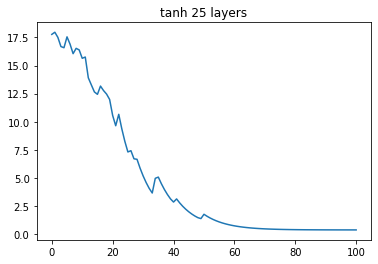

In [99]:
plt.plot(np.arange(loss_hist_t25.shape[0]),loss_hist_t25)
plt.title("tanh 25 layers")

Text(0.5, 1.0, 'tanh 50 layers')

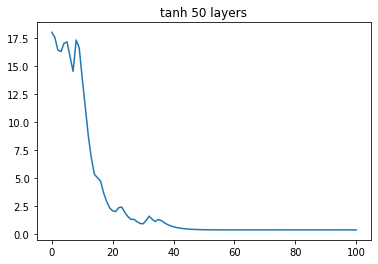

In [100]:
plt.plot(np.arange(loss_hist_t50.shape[0]),loss_hist_t50)
plt.title("tanh 50 layers")

Text(0.5, 1.0, 'tanh 25 layers')

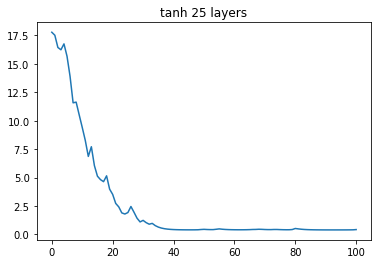

In [101]:
plt.plot(np.arange(loss_hist_t75.shape[0]),loss_hist_t75)
plt.title("tanh 25 layers")

Text(0.5, 1.0, 'relu 25 layers')

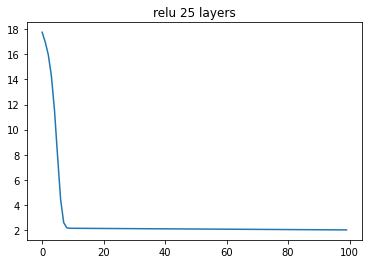

In [102]:
plt.plot(np.arange(loss_hist_r25.shape[0]-1),loss_hist_r25[1:])
plt.title("relu 25 layers")

Text(0.5, 1.0, 'relu 50 layers')

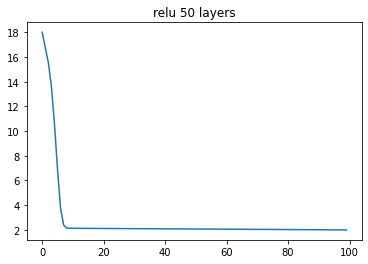

In [103]:
plt.plot(np.arange(loss_hist_r50.shape[0]-1),loss_hist_r50[1:])
plt.title("relu 50 layers")

Text(0.5, 1.0, 'relu 75 layers')

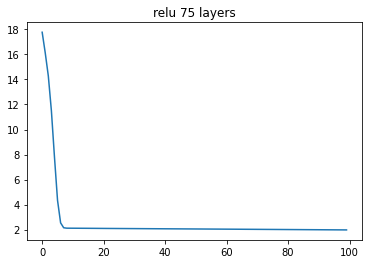

In [104]:
plt.plot(np.arange(loss_hist_r75.shape[0]-1),loss_hist_r75[1:])
plt.title("relu 75 layers")

### Observations :



*   Relu converges faster than tanh
*   The addition of more hidden units does not significantly change performance 



## Part B Quick Prop

In [105]:
def train_quick(X_train,y_train,step,hidden_layer,epoch,activation = 'R'):
  
  w0,w1,b0,b1 = initialise_weights(X_train.shape[0],hidden_layer,1)
  w0 = w0*0.0001
  w1 = w1*0.0001
  b0 = b0*0.0001
  b1 = b1*0.0001

  m = X_train.shape[1]
  p1 = predict(X_train,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)

  dw1_prev = np.zeros(w1.shape)
  dw0_prev = np.zeros(w0.shape)
  db1_prev = np.zeros(b1.shape)
  db0_prev = np.zeros(b0.shape)
  
  dw1_step_prev = np.ones(w1.shape)*0.5*step/m
  dw0_step_prev = np.ones(w0.shape)*0.5*step/m
  db1_step_prev = np.ones(b1.shape)*0.5*step/m
  db0_step_prev = np.ones(b0.shape)*0.5*step/m

  loss_hist = []

  loss_hist.append(l1)

  for i in range(epoch):
    dw1 = np.zeros(w1.shape)
    dw0 = np.zeros(w0.shape)
    db1 = np.zeros(b1.shape)
    db0 = np.zeros(b0.shape)
    loss = 0
    for j in range(m):
      
      x = X_train[:,j].reshape(-1,1)
      y = y_train[j]

      z1,a1,z2 = forward_Q5(x,w0,w1,b0,b1,activation)
      loss_j = np.square(np.squeeze(z2) - y)/2
      loss = loss + loss_j

      dw1_j,dw0_j,db1_j,db0_j = backward_Q5(z2,a1,z1,w1,x,y,activation)
      dw1 = dw1 + dw1_j
      dw0 = dw0 + dw0_j
      db1 = db1 + db1_j
      db0 = db0 + db0_j


    if i%10 == 0:
      print("at epoch = ",i+1 ,"loss = " , loss/m)
      # print(dw1)
    
    loss_hist.append(loss/m)

    if i > 0 :
      dw1_step = dw1_step_prev*np.divide(dw1,dw1 + 0.0001 - dw1_prev)
      dw0_step = dw0_step_prev*np.divide(dw0,dw0 + 0.0001 - dw0_prev)
      db1_step = db1_step_prev*np.divide(db1,db1 + 0.0001 - db1_prev)
      db0_step = db0_step_prev*np.divide(db0,db0 + 0.0001 - db0_prev)

    else:
      dw1_step = dw1*0.5*step/m
      dw0_step = dw0*0.5*step/m
      db1_step = db1*0.5*step/m
      db0_step = db0*0.5*step/m

    w1 = w1 - dw1_step
    w0 = w0 - dw0_step
    b1 = b1 - db1_step
    b0 = b0 - db0_step

    dw1_step_prev = dw1_step
    dw0_step_prev = dw0_step
    db1_step_prev = db1_step
    db0_step_prev = db0_step

    dw1 = dw1_prev
    dw0 = dw0_prev
    db1 = db1_prev
    db0 = db0_prev

  return w1,w0,b1,b0,np.array(loss_hist)

In [106]:
table = []

### Part 1 tanh layers = 25

In [107]:
w1,w0,b1,b0,loss_hist_t25 = train_quick(X_train.T,y_train.copy().T,0.02,25,100,'T')  

at epoch =  1 loss =  17.765677866012158
at epoch =  11 loss =  14.396488691945514
at epoch =  21 loss =  11.413266458446754
at epoch =  31 loss =  8.792603419505117
at epoch =  41 loss =  6.520378062971235
at epoch =  51 loss =  4.59882259132018
at epoch =  61 loss =  3.033221821900026
at epoch =  71 loss =  1.8283415439355146
at epoch =  81 loss =  0.9860388623945128
at epoch =  91 loss =  0.4989237340831866


In [108]:
p1 = predict(X_train.T,w1,w0,b1,b0,'T')
p2 = predict(X_test.T,w1,w0,b1,b0,'T')
l1 = MSE(p1,y_train)
l2 = MSE(p2,y_test)
table.append([l1,l2])

Text(0.5, 1.0, 'tanh 25 layers')

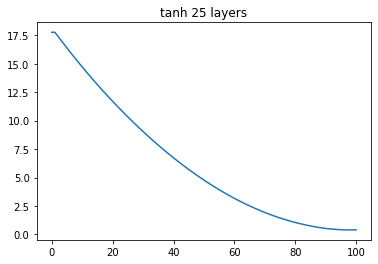

In [109]:
plt.plot(np.arange(loss_hist_t25.shape[0]),loss_hist_t25)
plt.title("tanh 25 layers")

### Part 2 tanh layers = 50

In [110]:
w1,w0,b1,b0,loss_hist_t50 = train_quick(X_train.T,y_train.copy().T,0.03,50,70,'T')  

at epoch =  1 loss =  17.765245219149403
at epoch =  11 loss =  13.104311557457944
at epoch =  21 loss =  9.207395771858913
at epoch =  31 loss =  6.066113811846058
at epoch =  41 loss =  3.623843688158227
at epoch =  51 loss =  1.8617909913905197
at epoch =  61 loss =  0.7840142986837548


In [111]:
p1 = predict(X_train.T,w1,w0,b1,b0,'T')
p2 = predict(X_test.T,w1,w0,b1,b0,'T')
l1 = MSE(p1,y_train)
l2 = MSE(p2,y_test)
table.append([l1,l2])

Text(0.5, 1.0, 'tanh 50 layers')

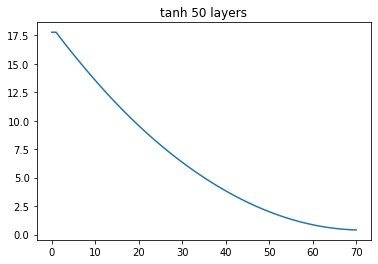

In [112]:
plt.plot(np.arange(loss_hist_t50.shape[0]),loss_hist_t50)
plt.title("tanh 50 layers")

### Part 3 tanh layers = 75

In [113]:
w1,w0,b1,b0,loss_hist_t75 = train_quick(X_train.T,y_train.copy().T,0.03,75,70,'T')  

at epoch =  1 loss =  17.76559476058196
at epoch =  11 loss =  13.290304523742646
at epoch =  21 loss =  9.65877103367152
at epoch =  31 loss =  6.640448689573173
at epoch =  41 loss =  4.205616363629181
at epoch =  51 loss =  2.3589461000691365
at epoch =  61 loss =  1.1186572028306203


In [114]:
p1 = predict(X_train.T,w1,w0,b1,b0,'T')
p2 = predict(X_test.T,w1,w0,b1,b0,'T')
l1 = MSE(p1,y_train)
l2 = MSE(p2,y_test)
table.append([l1,l2])

Text(0.5, 1.0, 'tanh 75 layers')

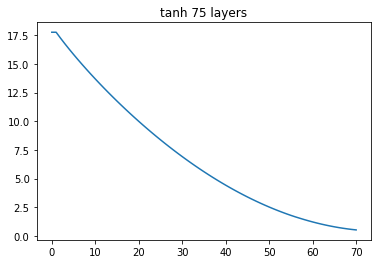

In [115]:
plt.plot(np.arange(loss_hist_t75.shape[0]),loss_hist_t75)
plt.title("tanh 75 layers")

### Part 4 relu layers = 25

In [116]:
w1,w0,b1,b0,loss_hist_r25 = train_quick(X_train.T,y_train.copy().T,0.02,25,70,'R')

at epoch =  1 loss =  17.7656429276369
at epoch =  11 loss =  14.253702777808487
at epoch =  21 loss =  10.785263150121922
at epoch =  31 loss =  7.528317693176895
at epoch =  41 loss =  4.67080044718223
at epoch =  51 loss =  2.42055560499164
at epoch =  61 loss =  1.0053375466717465


In [117]:
p1 = predict(X_train.T,w1,w0,b1,b0)
p2 = predict(X_test.T,w1,w0,b1,b0)
l1 = MSE(p1,y_train)
l2 = MSE(p2,y_test)
table.append([l1,l2])

Text(0.5, 1.0, 'relu 25 layers')

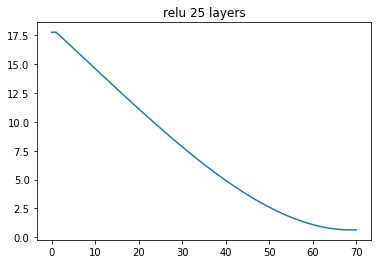

In [118]:
plt.plot(np.arange(loss_hist_r25.shape[0]),loss_hist_r25)
plt.title("relu 25 layers")

### Part 5 relu layers = 50

In [119]:
w1,w0,b1,b0,loss_hist_r50 = train_quick(X_train.T,y_train.copy().T,0.02,50,70,'R')

at epoch =  1 loss =  17.765318175244104
at epoch =  11 loss =  14.20763408384701
at epoch =  21 loss =  10.627339724954345
at epoch =  31 loss =  7.238780665992222
at epoch =  41 loss =  4.286331535466442
at epoch =  51 loss =  2.044330560839778
at epoch =  61 loss =  0.8170706249726027


In [120]:
p1 = predict(X_train.T,w1,w0,b1,b0)
p2 = predict(X_test.T,w1,w0,b1,b0)
l1 = MSE(p1,y_train)
l2 = MSE(p2,y_test)
table.append([l1,l2])

Text(0.5, 1.0, 'relu 50 layers')

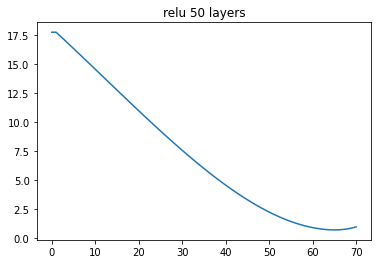

In [121]:
plt.plot(np.arange(loss_hist_r50.shape[0]),loss_hist_r50)
plt.title("relu 50 layers")

### Part 6 relu layers = 75

In [122]:
w1,w0,b1,b0,loss_hist_r75 = train_quick(X_train.T,y_train.copy().T,0.015,75,70,'R')

at epoch =  1 loss =  17.76564070645491
at epoch =  11 loss =  14.969617202628482
at epoch =  21 loss =  11.92765394575642
at epoch =  31 loss =  8.82864975802501
at epoch =  41 loss =  5.896207774030257
at epoch =  51 loss =  3.3885562098532787
at epoch =  61 loss =  1.5985503258388638


In [123]:
p1 = predict(X_train.T,w1,w0,b1,b0)
p2 = predict(X_test.T,w1,w0,b1,b0)
l1 = MSE(p1,y_train)
l2 = MSE(p2,y_test)
table.append([l1,l2])

Text(0.5, 1.0, 'relu 75 layers')

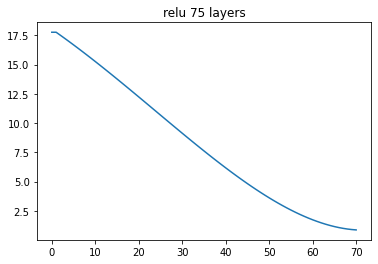

In [124]:
plt.plot(np.arange(loss_hist_r75.shape[0]),loss_hist_r75)
plt.title("relu 75 layers")

### Part 7 Comparision for Quick Prop

In [125]:
print("train error and test error for tanh with 25 layer = ",table[0][0],table[0][1])
print("train error and test error for tanh with 50 layer = ",table[1][0],table[1][1])
print("train error and test error for tanh with 75 layer = ",table[2][0],table[2][1])
print("train error and test error for relu with 25 layer = ",table[3][0],table[3][1])
print("train error and test error for relu with 50 layer = ",table[4][0],table[4][1])
print("train error and test error for relu with 75 layer = ",table[5][0],table[5][1])

train error and test error for tanh with 25 layer =  0.41610671729736776 0.40942896350034347
train error and test error for tanh with 50 layer =  0.4015844371368584 0.38353500612532715
train error and test error for tanh with 75 layer =  0.4859064111644801 0.4480983002783044
train error and test error for relu with 25 layer =  0.6728110027310369 0.633467855633921
train error and test error for relu with 50 layer =  1.0675390839985823 0.9139332096801149
train error and test error for relu with 75 layer =  0.8536722928151665 0.7816545041082243


## Part C  RProp

In [126]:
def train_Rprop(X_train,y_train,step,hidden_layer,epoch,alpha,beta,w_max,activation = 'R'):
  
  w0,w1,b0,b1 = initialise_weights(X_train.shape[0],hidden_layer,1)
  w0 = w0*0.01
  w1 = w1*0.01
  b0 = b0*0.01
  b1 = b1*0.01

  p1 = predict(X_train,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)

  m = X_train.shape[1]

  dw1_prev = np.zeros(w1.shape)
  dw0_prev = np.zeros(w0.shape)
  db1_prev = np.zeros(b1.shape)
  db0_prev = np.zeros(b0.shape)
  
  dw1_step = np.ones(w1.shape)*0.5*step/m
  dw0_step = np.ones(w0.shape)*0.5*step/m
  db1_step = np.ones(b1.shape)*0.5*step/m
  db0_step = np.ones(b0.shape)*0.5*step/m

  loss_hist = []
  loss_hist.append(l1)

  for i in range(epoch):
    dw1 = np.zeros(w1.shape)
    dw0 = np.zeros(w0.shape)
    db1 = np.zeros(b1.shape)
    db0 = np.zeros(b0.shape)
    loss = 0
    for j in range(m):
      
      x = X_train[:,j].reshape(-1,1)
      y = y_train[j]

      z1,a1,z2 = forward_Q5(x,w0,w1,b0,b1,activation)
      loss_j = np.square(np.squeeze(z2) - y)/2
      loss = loss + loss_j

      dw1_j,dw0_j,db1_j,db0_j = backward_Q5(z2,a1,z1,w1,x,y,activation)
      dw1 = dw1 + dw1_j
      dw0 = dw0 + dw0_j
      db1 = db1 + db1_j
      db0 = db0 + db0_j


    if i%10 == 0:
      print("at epoch = ",i+1 ,"loss = " , loss/m)
    
    if i > 0:
      for dim1 in range(w1.shape[0]):
        for dim2 in range(w1.shape[1]):
          if (dw1_prev[dim1][dim2] > 0 and dw1[dim1][dim2] > 0):
            dw1_step[dim1][dim2] = dw1_step[dim1][dim2] * alpha * -1
          if (dw1_prev[dim1][dim2] < 0 and dw1[dim1][dim2] < 0):
            dw1_step[dim1][dim2] = dw1_step[dim1][dim2] * alpha * 1
          if (dw1_prev[dim1][dim2] < 0 and dw1[dim1][dim2] > 0):
            dw1_step[dim1][dim2] = dw1_step[dim1][dim2] * beta * -1
          if (dw1_prev[dim1][dim2] > 0 and dw1[dim1][dim2] < 0):
            dw1_step[dim1][dim2] = dw1_step[dim1][dim2] * beta * 1
      
      for dim1 in range(w0.shape[0]):
        for dim2 in range(w0.shape[1]):
          if (dw0_prev[dim1][dim2] > 0 and dw0[dim1][dim2] > 0):
            dw0_step[dim1][dim2] = dw0_step[dim1][dim2] * alpha * -1
          if (dw0_prev[dim1][dim2] < 0 and dw0[dim1][dim2] < 0):
            dw0_step[dim1][dim2] = dw0_step[dim1][dim2] * alpha * 1
          if (dw0_prev[dim1][dim2] < 0 and dw0[dim1][dim2] > 0):
            dw0_step[dim1][dim2] = dw0_step[dim1][dim2] * beta * -1
          if (dw0_prev[dim1][dim2] > 0 and dw0[dim1][dim2] < 0):
            dw0_step[dim1][dim2] = dw0_step[dim1][dim2] * beta * 1
      
      for dim1 in range(b1.shape[0]):
        for dim2 in range(b1.shape[1]):
          if (db1_prev[dim1][dim2] > 0 and db1[dim1][dim2] > 0):
            db1_step[dim1][dim2] = db1_step[dim1][dim2] * alpha * -1
          if (db1_prev[dim1][dim2] < 0 and db1[dim1][dim2] < 0):
            db1_step[dim1][dim2] = db1_step[dim1][dim2] * alpha * 1
          if (db1_prev[dim1][dim2] < 0 and db1[dim1][dim2] > 0):
            db1_step[dim1][dim2] = db1_step[dim1][dim2] * beta * -1
          if (db1_prev[dim1][dim2] > 0 and db1[dim1][dim2] < 0):
            db1_step[dim1][dim2] = db1_step[dim1][dim2] * beta * 1

      for dim1 in range(b0.shape[0]):
        for dim2 in range(b0.shape[1]):
          if (db0_prev[dim1][dim2] > 0 and db1[dim1][dim2] > 0):
            db0_step[dim1][dim2] = db0_step[dim1][dim2] * alpha * -1
          if (db0_prev[dim1][dim2] < 0 and db1[dim1][dim2] < 0):
            db0_step[dim1][dim2] = db0_step[dim1][dim2] * alpha * 1
          if (db0_prev[dim1][dim2] < 0 and db1[dim1][dim2] > 0):
            db0_step[dim1][dim2] = db0_step[dim1][dim2] * beta * -1
          if (db0_prev[dim1][dim2] > 0 and db0[dim1][dim2] < 0):
            db0_step[dim1][dim2] = db0_step[dim1][dim2] * beta * 1
      
      else :
        dw1_step = dw1 * dw1_step
        dw0_step = dw0 * dw0_step
        db1_step = db1 * db1_step
        db0_step = db0 * db0_step


    loss_hist.append(loss/m)

    w1 = w1 - dw1_step
    w0 = w0 - dw0_step
    b1 = b1 - db1_step
    b0 = b0 - db0_step

    dw0_prev = dw0
    dw1_prev = dw1
    db0_prev = db0
    db1_prev = db1
  
  return w1,w0,b1,b0,np.array(loss_hist)

In [133]:
def compare1(X_train,y_train,X_test,y_test):

  table = []
  
  w1,w0,b1,b0,loss_hist_t25 = train_Rprop(X_train.T,y_train.copy().T,0.01,25,50,1.2,0.5,1,'T') 
  p1 = predict(X_train.T,w1,w0,b1,b0)
  p2 = predict(X_test.T,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  w1,w0,b1,b0,loss_hist_t50 = train_Rprop(X_train.T,y_train.copy().T,0.01,50,70,1.2,0.5,1,'T')
  p1 = predict(X_train.T,w1,w0,b1,b0)
  p2 = predict(X_test.T,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  w1,w0,b1,b0,loss_hist_t75 = train_Rprop(X_train.T,y_train.copy().T,0.01,75,50,1.2,0.5,1,'T')  
  p1 = predict(X_train.T,w1,w0,b1,b0)
  p2 = predict(X_test.T,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  w1,w0,b1,b0,loss_hist_r25 = train_quick(X_train.T,y_train.copy().T,0.01,25,70,1.2,0.5,1,'R')
  p1 = predict(X_train.T,w1,w0,b1,b0)
  p2 = predict(X_test.T,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  w1,w0,b1,b0,loss_hist_r50 = train_Rprop(X_train.T,y_train.copy().T,0.01,50,70,1.2,0.5,1,'R')
  p1 = predict(X_train.T,w1,w0,b1,b0)
  p2 = predict(X_test.T,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  w1,w0,b1,b0,loss_hist_r75 = train_Rprop(X_train.T,y_train.copy().T,0.015,75,70,1.2,0.5,1,'R')
  p1 = predict(X_train.T,w1,w0,b1,b0)
  p2 = predict(X_test.T,w1,w0,b1,b0)
  l1 = MSE(p1,y_train)
  l2 = MSE(p2,y_test)
  table.append([l1,l2])

  return table,loss_hist_t25,loss_hist_t50,loss_hist_t75,loss_hist_r25,loss_hist_r50,loss_hist_r75

In [134]:
table,loss_hist_t25,loss_hist_t50,loss_hist_t75,loss_hist_r25,loss_hist_r50,loss_hist_r75 = compare1(X_train,y_train,X_test,y_test)

at epoch =  1 loss =  17.76589021297813
at epoch =  11 loss =  13.11827090399746
at epoch =  21 loss =  9.269820917631767
at epoch =  31 loss =  6.1308390681856
at epoch =  41 loss =  3.678871271573978
at epoch =  1 loss =  17.7650996664197
at epoch =  11 loss =  13.052995873345715
at epoch =  21 loss =  9.02471355448453
at epoch =  31 loss =  5.745555796982672
at epoch =  41 loss =  3.2440941679720425
at epoch =  51 loss =  1.5249922537610547
at epoch =  61 loss =  0.5881067150067977
at epoch =  1 loss =  17.765790478464602
at epoch =  11 loss =  10.928993051246282
at epoch =  21 loss =  5.732596117969916
at epoch =  31 loss =  2.311595826418975
at epoch =  41 loss =  0.6078636113390831
at epoch =  1 loss =  17.765596080734053
at epoch =  11 loss =  16.04325076375202
at epoch =  21 loss =  14.359386581558926
at epoch =  31 loss =  12.723128963559263
at epoch =  41 loss =  11.143970633098936
at epoch =  51 loss =  9.631720909170411
at epoch =  61 loss =  8.196506397568374
at epoch =  1

### Comparision for Rprop

In [135]:
print("train error and test error for tanh with 25 layer = ",table[0][0],table[0][1])
print("train error and test error for tanh with 50 layer = ",table[1][0],table[1][1])
print("train error and test error for tanh with 75 layer = ",table[2][0],table[2][1])
print("train error and test error for relu with 25 layer = ",table[3][0],table[3][1])
print("train error and test error for relu with 50 layer = ",table[4][0],table[4][1])
print("train error and test error for relu with 75 layer = ",table[5][0],table[5][1])

train error and test error for tanh with 25 layer =  0.9939969315368848 0.9157783356418422
train error and test error for tanh with 50 layer =  0.9188567262552373 0.9439196659420858
train error and test error for tanh with 75 layer =  0.5969430112911471 0.5555423228753157
train error and test error for relu with 25 layer =  6.848771266987173 6.639773612707352
train error and test error for relu with 50 layer =  6.073129775209742 5.873132276719079
train error and test error for relu with 75 layer =  3.334930194990835 3.1859993356206733


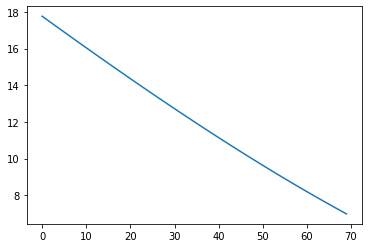

In [136]:
plt.plot(np.arange(loss_hist_r25.shape[0]-1),loss_hist_r25[1:])

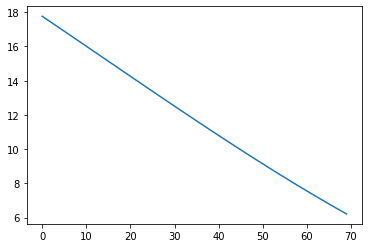

In [137]:
plt.plot(np.arange(loss_hist_r25.shape[0]-1),loss_hist_r50[1:])

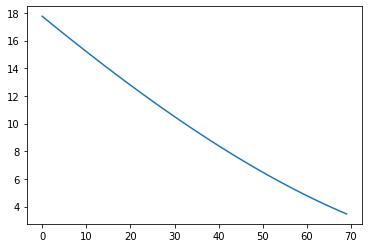

In [138]:
plt.plot(np.arange(loss_hist_r25.shape[0]-1),loss_hist_r75[1:])

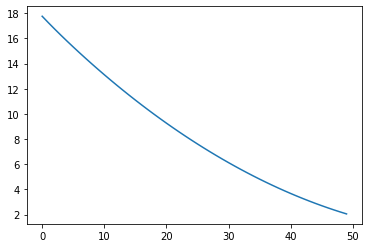

In [139]:
plt.plot(np.arange(loss_hist_t25.shape[0]-1),loss_hist_t25[1:])

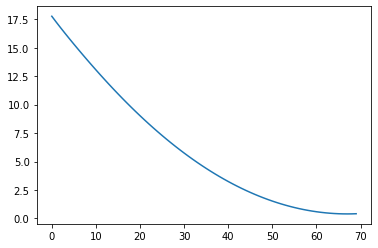

In [140]:
plt.plot(np.arange(loss_hist_t50.shape[0]-1),loss_hist_t50[1:])

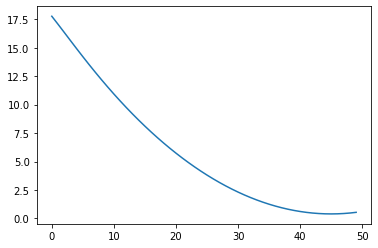

In [141]:
plt.plot(np.arange(loss_hist_t75.shape[0]-1),loss_hist_t75[1:])

# Q6

## Part 1

In [142]:
def cost_Q6(X,W,y,b):

  predicted = (np.dot(W.T,X).T) + b
  y1 = y.reshape(predicted.shape)
  diff = y1 - predicted
  J = np.mean(np.square(diff),axis=0)/2
  
  return J

In [143]:
def gradient_Q6(W,X,y,b):

  predicted = (np.dot(W.T,X).T) + b
  y1 = y.reshape(predicted.shape)
  diff = predicted - y1
  grad_w = np.dot(X,diff)/diff.shape[0]
  grad_b = np.mean(diff)

  return grad_w,grad_b

In [144]:
def gradient_des_Q6(X,W,b,y,step,X_test,y_test):

  epoch = 0
  train_loss = []
  test_loss = []
  while True:
    
    grad_w,grad_b = gradient_Q6(W,X,y,b)
    W = W - step*grad_w
    b = b - step*grad_b
    epoch = epoch + 1

    J = np.squeeze(cost_Q6(X,W,y,b))
    train_loss.append(J)

    J = np.squeeze(cost_Q6(X_test,W,y_test,b))
    test_loss.append(J)

    if epoch == 10000 or abs(cost_Q6(X,W,y,b) - cost_Q6(X,W+step*grad_w,y,b+step*grad_b)) < 0.000001:
      break
    
  return W,b,np.array(train_loss),np.array(test_loss),epoch

## Part 2

In [146]:
mean1 = np.array((-3,4))
mean2 = np.array((4,-3))
np.random.seed(0)
mat = np.array(((16,0),(0,9)))

X_train1 = np.random.multivariate_normal(mean1,mat,200)
y_train1 = np.ones(200)
X_train2 = np.random.multivariate_normal(mean2,mat,200)
y_train2 = -np.ones(200)

X_test1 = np.random.multivariate_normal(mean1,mat,100)
y_test1 = np.ones(100)

X_test2 = np.random.multivariate_normal(mean2,mat,100)
y_test2 = -np.ones(100)

X = np.hstack(((X_train1.T,X_train2.T))).T
y = np.hstack((y_train1,y_train2))

X_test = np.hstack((X_test1.T,X_test2.T)).T
y_test = np.hstack((y_test1,y_test2))

print(X_train1.shape)
print(X.shape,y.shape,X_test.shape)

(200, 2)
(400, 2) (400,) (200, 2)


## Part 3

In [147]:
W0 = np.random.randn(2,1)
b0 = np.random.randn(1)

In [148]:
W,b,train_loss,test_loss,epoch = gradient_des_Q6(X.T,W0,b0,y,0.05,X_test.T,y_test)

In [149]:
J = cost_Q6(X.T,W,y,b)

In [150]:
print(J)

[0.15253845]


In [151]:
def tune(X_train,y,X_test,y_test,W0,b0):

  step_array = np.arange(0.001,0.05,0.005)
  for step in step_array:
    W,b,train_loss,test_loss,epoch = gradient_des_Q6(X.T,W0,b0,y,step,X_test.T,y_test)
    fig,ax = plt.subplots()
    fig.set_figwidth(24)
    fig.set_figheight(12)
    ax.plot(np.arange(epoch),train_loss,'r')
    ax.plot(np.arange(epoch),test_loss,'b')
    plt.title("plot for step = " + str(step))
    fig.show()


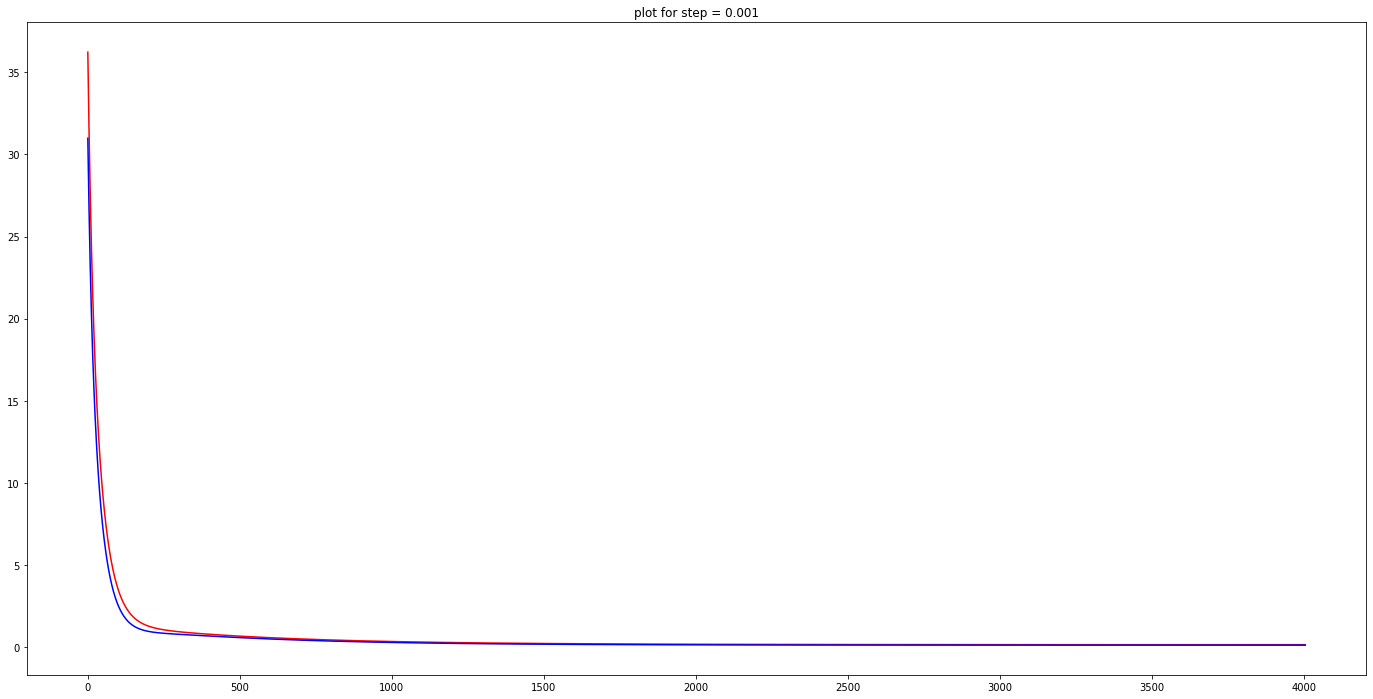

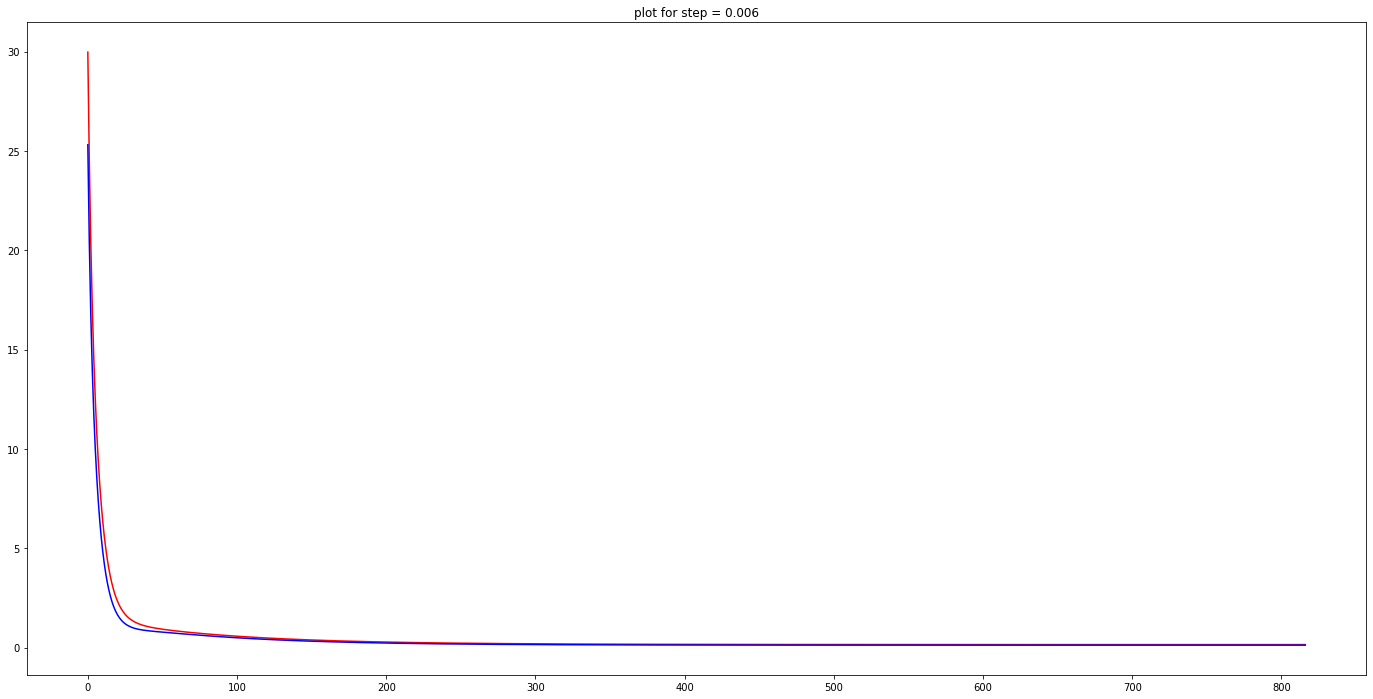

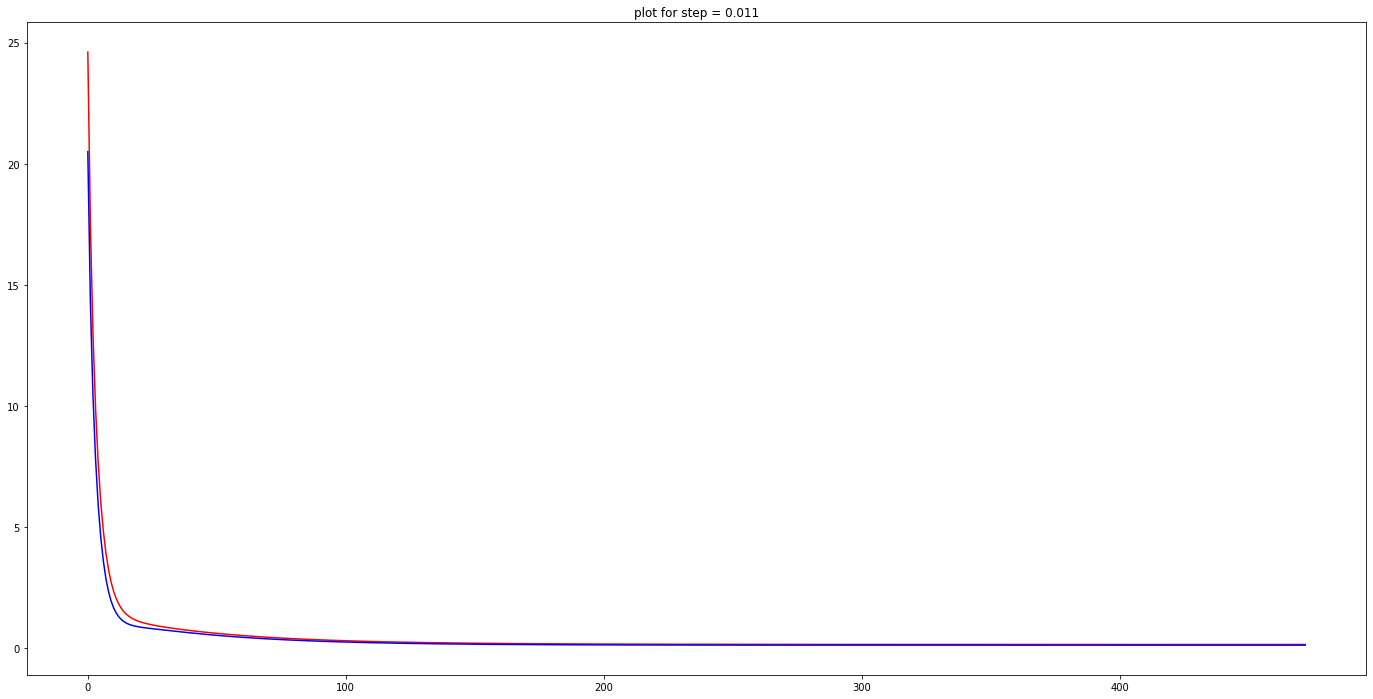

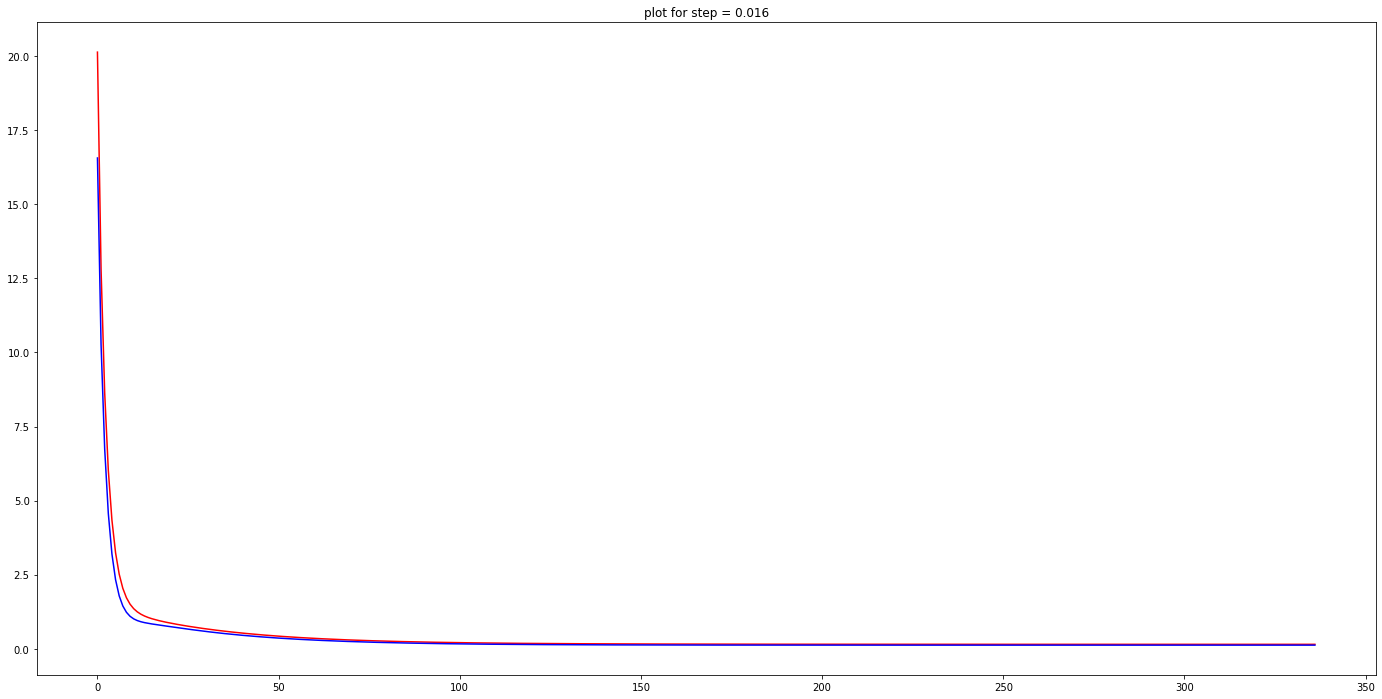

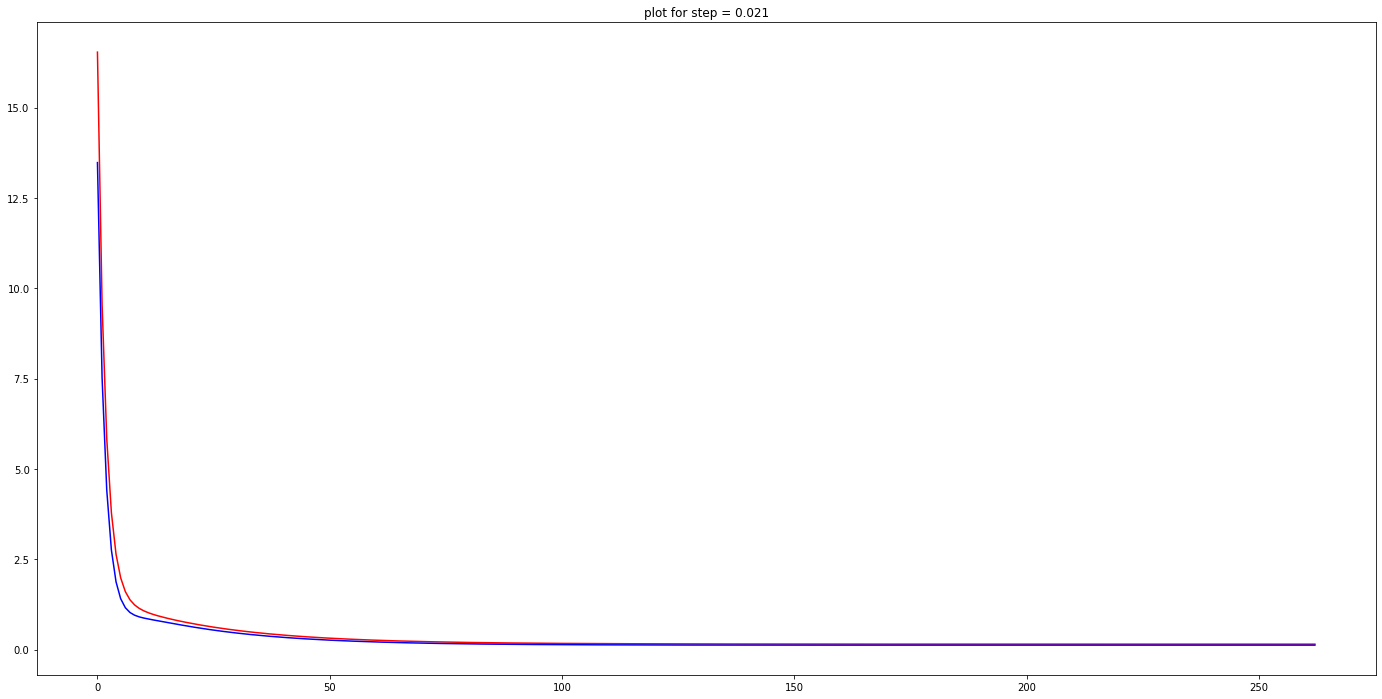

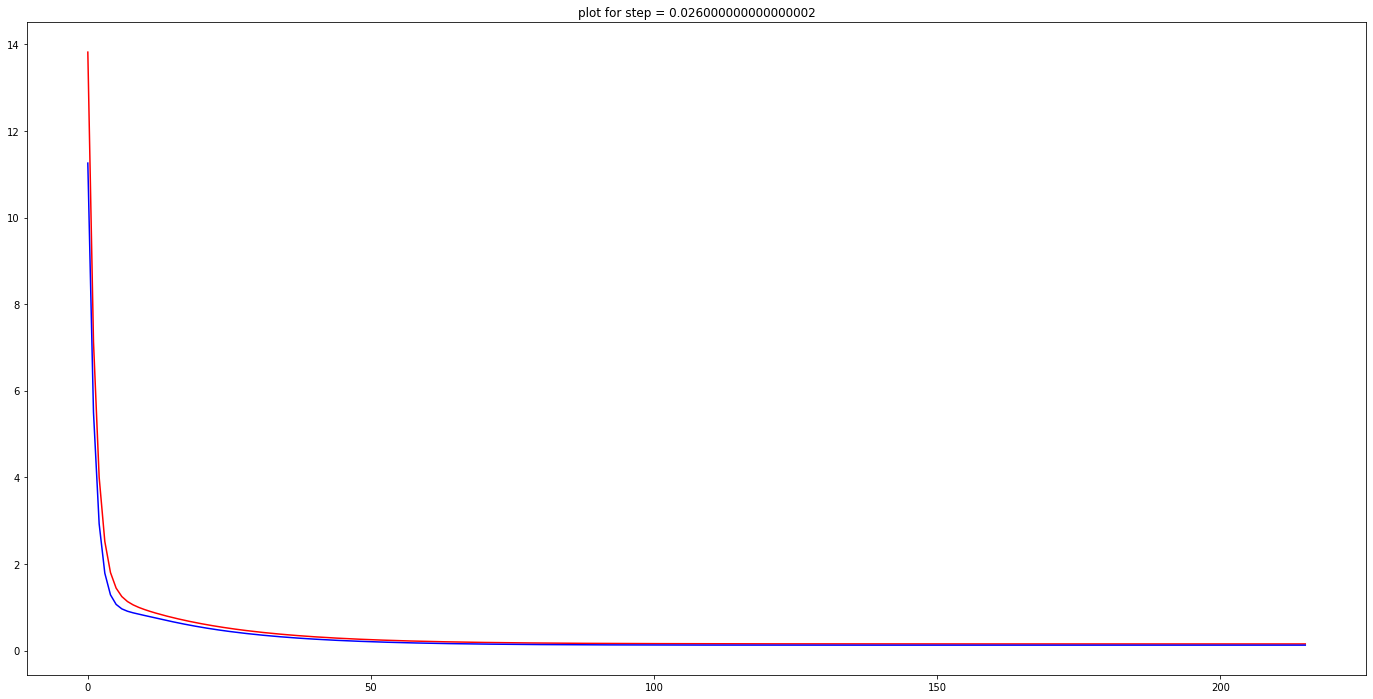

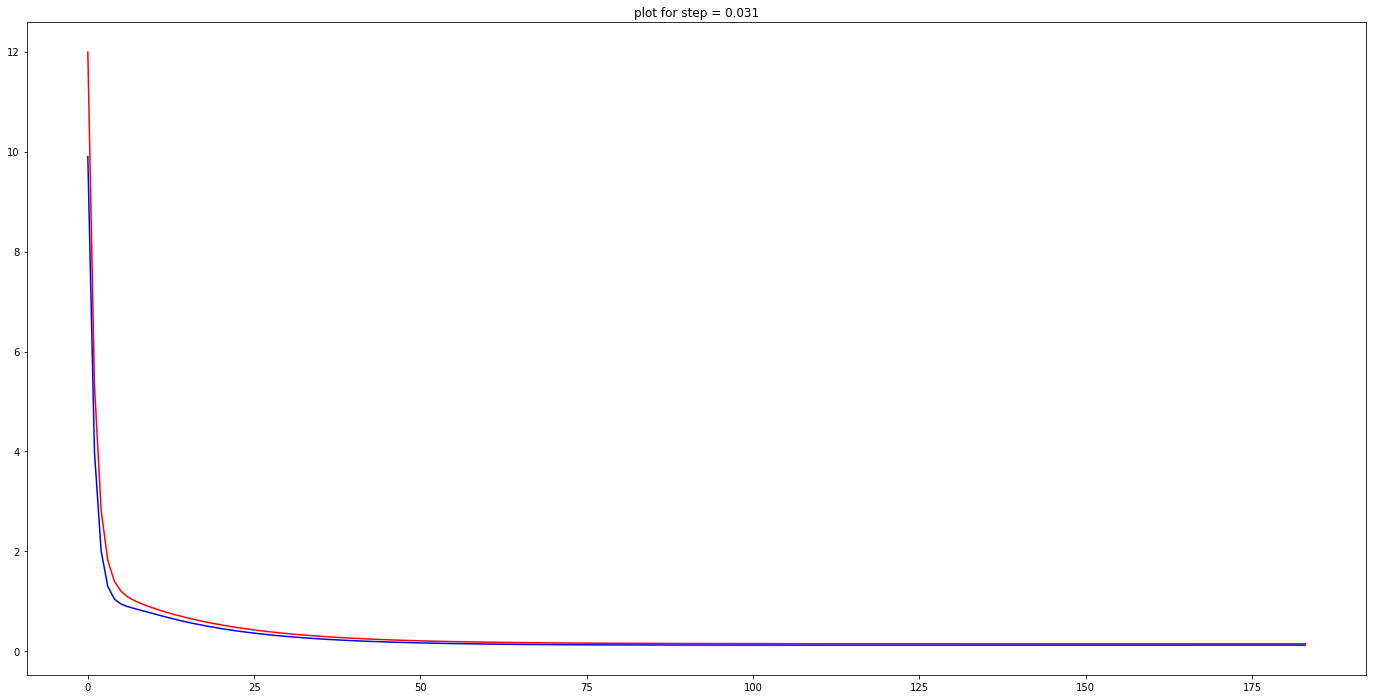

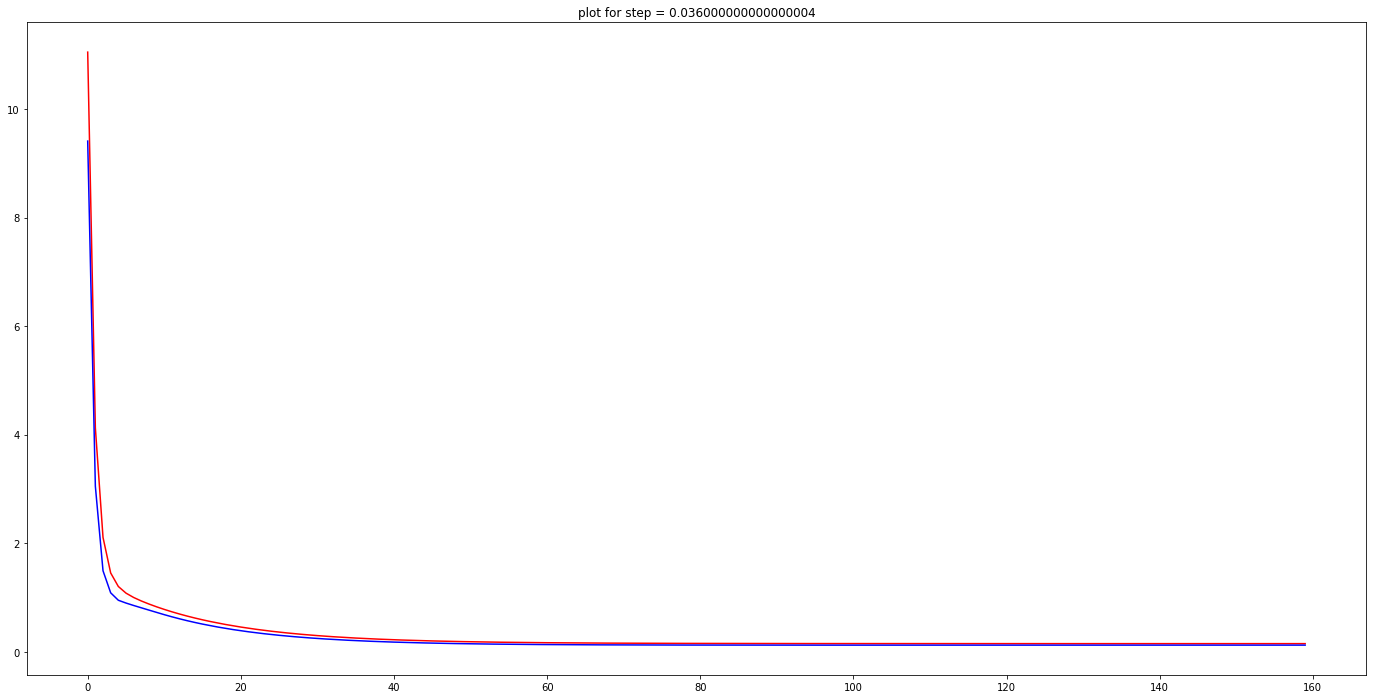

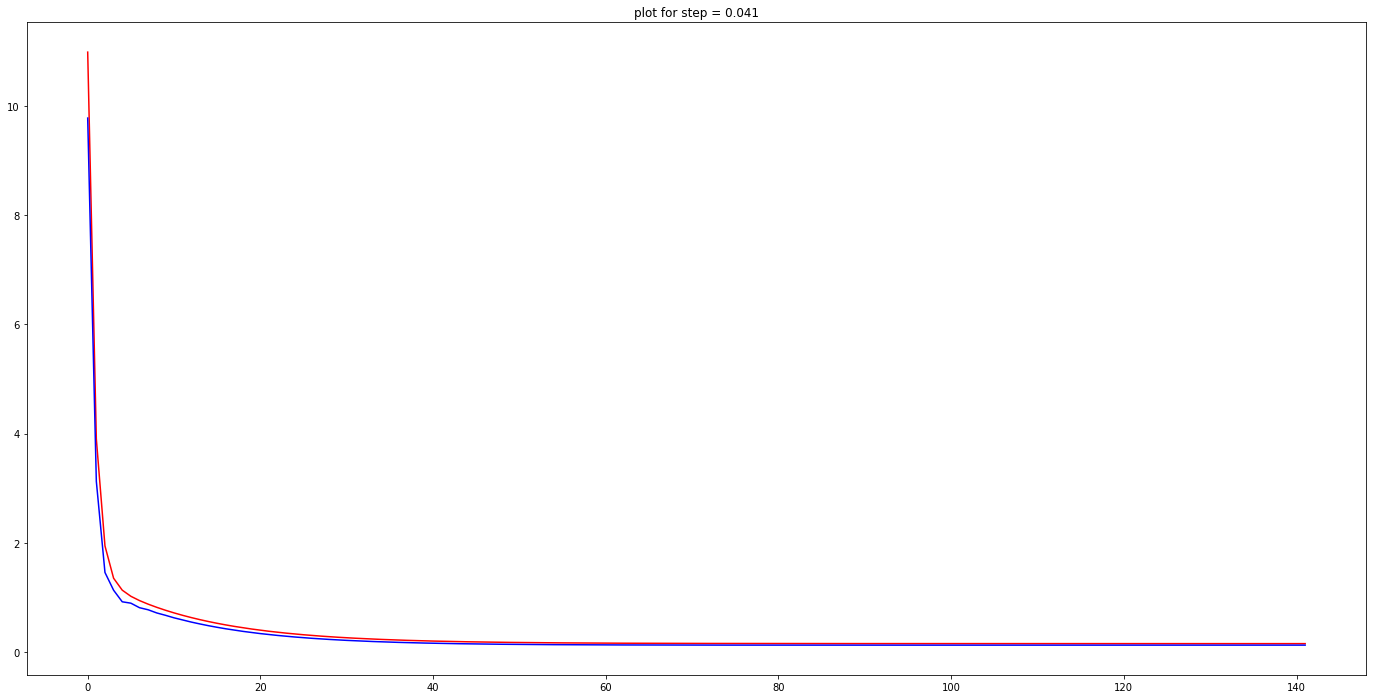

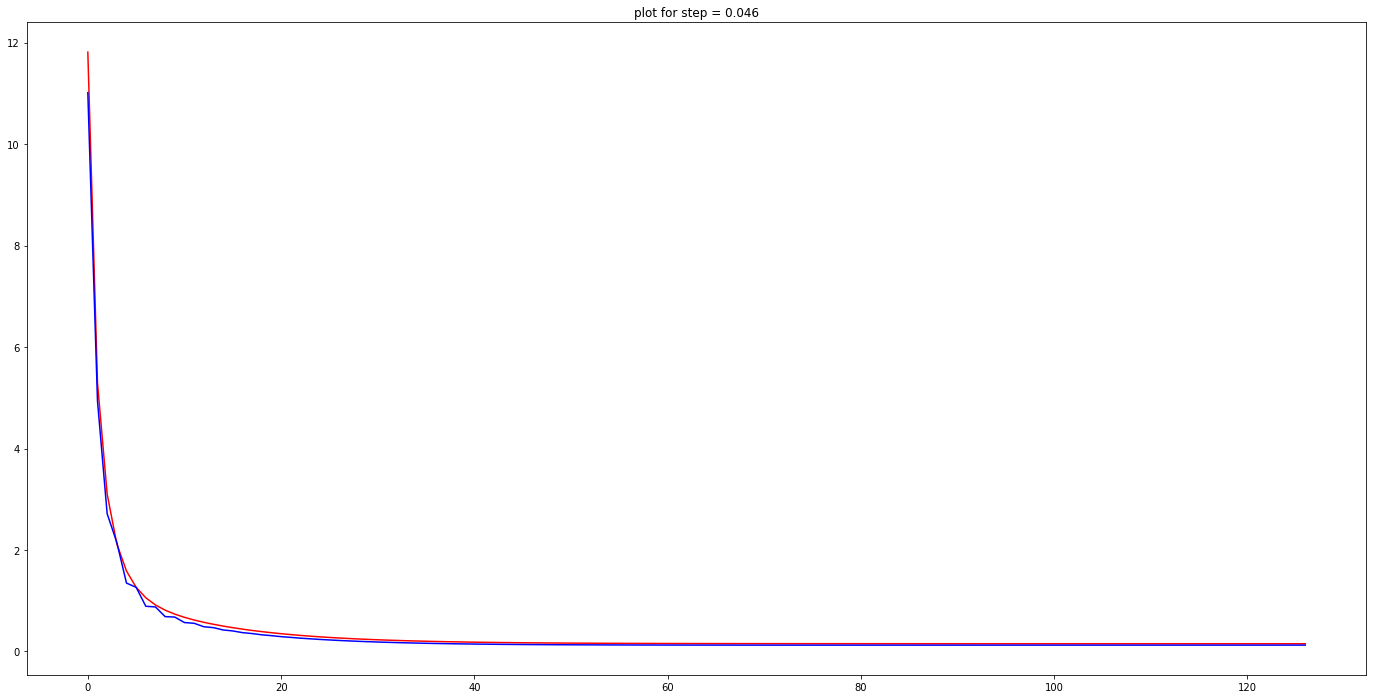

In [152]:
tune(X_train,y,X_test,y_test,W0,b0)

As we can see step sizes from the range [0.001,0.007] converge and give error around 0.152 and thus our model is highly accurate.




## Part 4


[0.15253845]


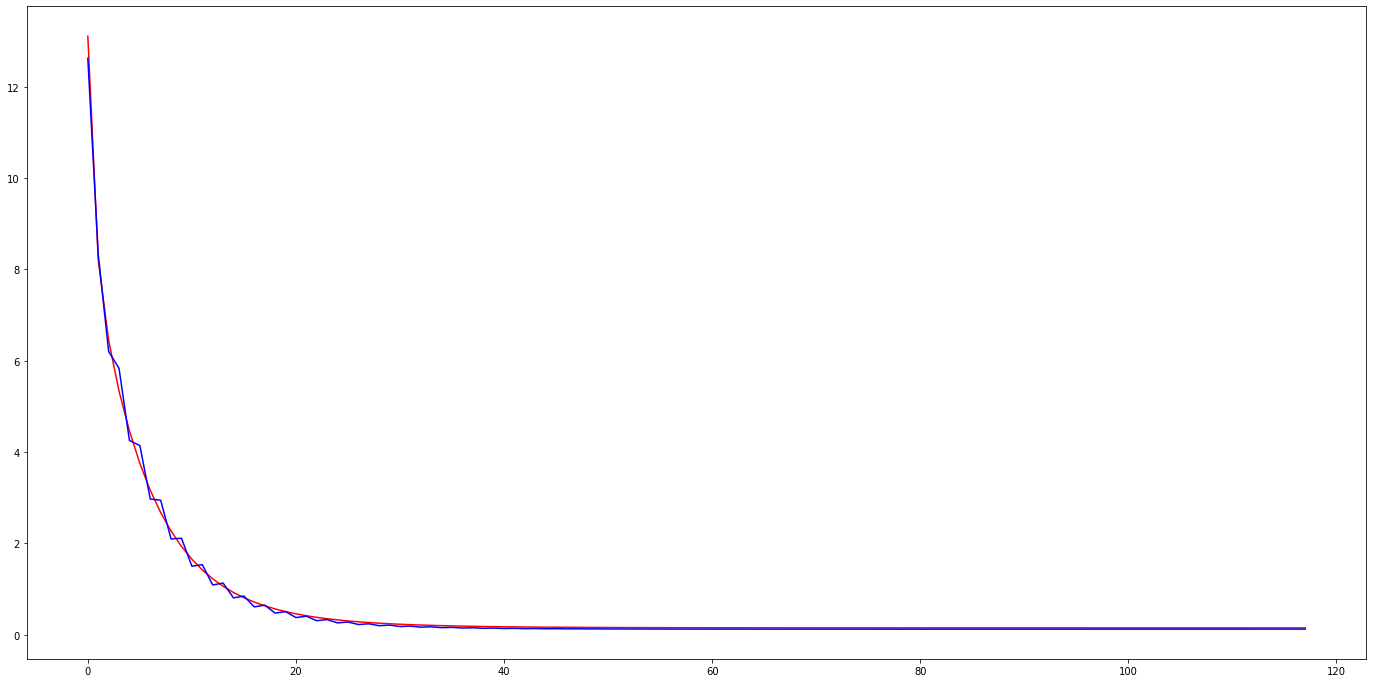

In [153]:
W,b,train_loss,test_loss,epoch = gradient_des_Q6(X.T,W0,b0,y,0.05,X_test.T,y_test)
J = cost_Q6(X.T,W,y,b)
print(J)
fig,ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(12)
ax.plot(np.arange(epoch),train_loss,'r')
ax.plot(np.arange(epoch),test_loss,'b')


As can be seen from the graphs there is no danger of overfitting . This is because our model gives a linear classifier as we have not used any non-linear activation functions . Thus our model cannot be overfit .

## Part 5

We can be sure that we can achieve minimum bayes error as both the samples X_train1 and X_train2 have the same covarience matrix i.e. $\Sigma_1 =. \Sigma_2$

## Part 6

In [154]:
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)

X = X - X_mean
X = np.divide(X,X_std)

X_test = X_test - X_mean
X_test = np.divide(X_test,X_std)

print(X_mean)
print(np.mean(X_test,axis=0),np.std(X_test,axis=0))

[0.14104452 0.32802754]
[0.17883955 0.04833605] [1.03589318 0.97448884]


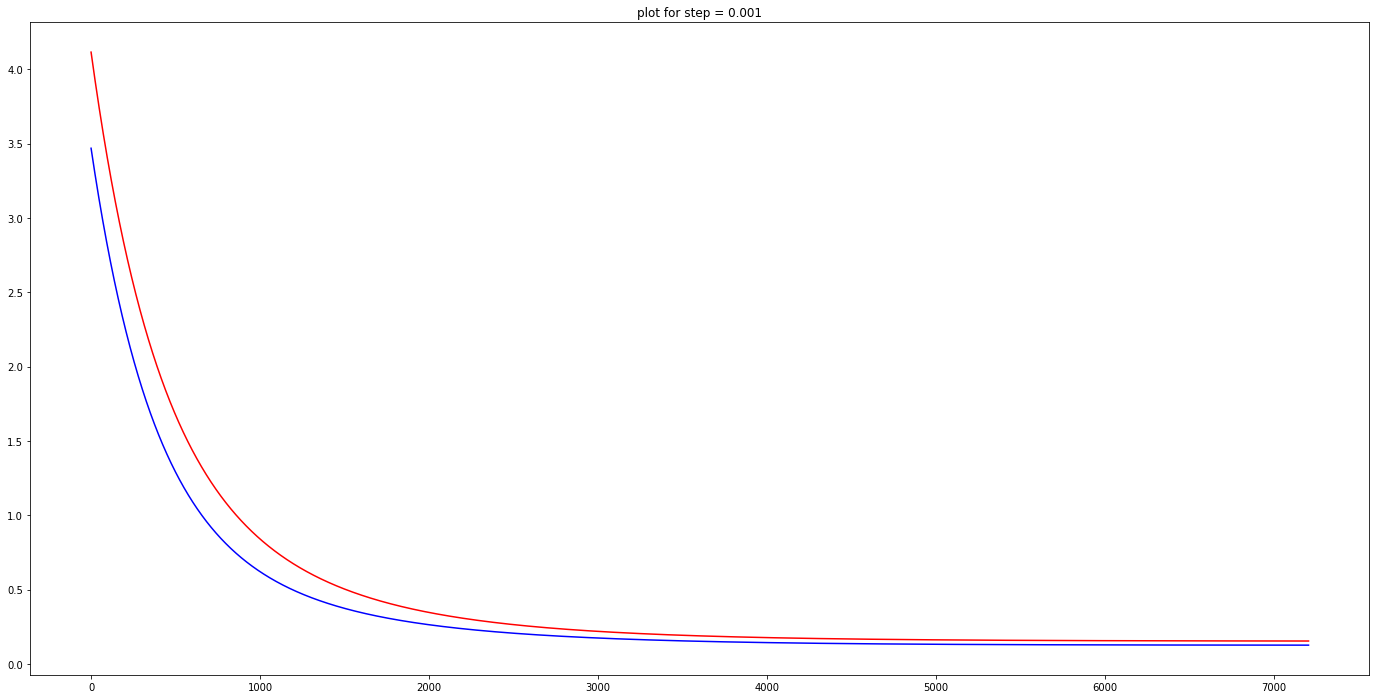

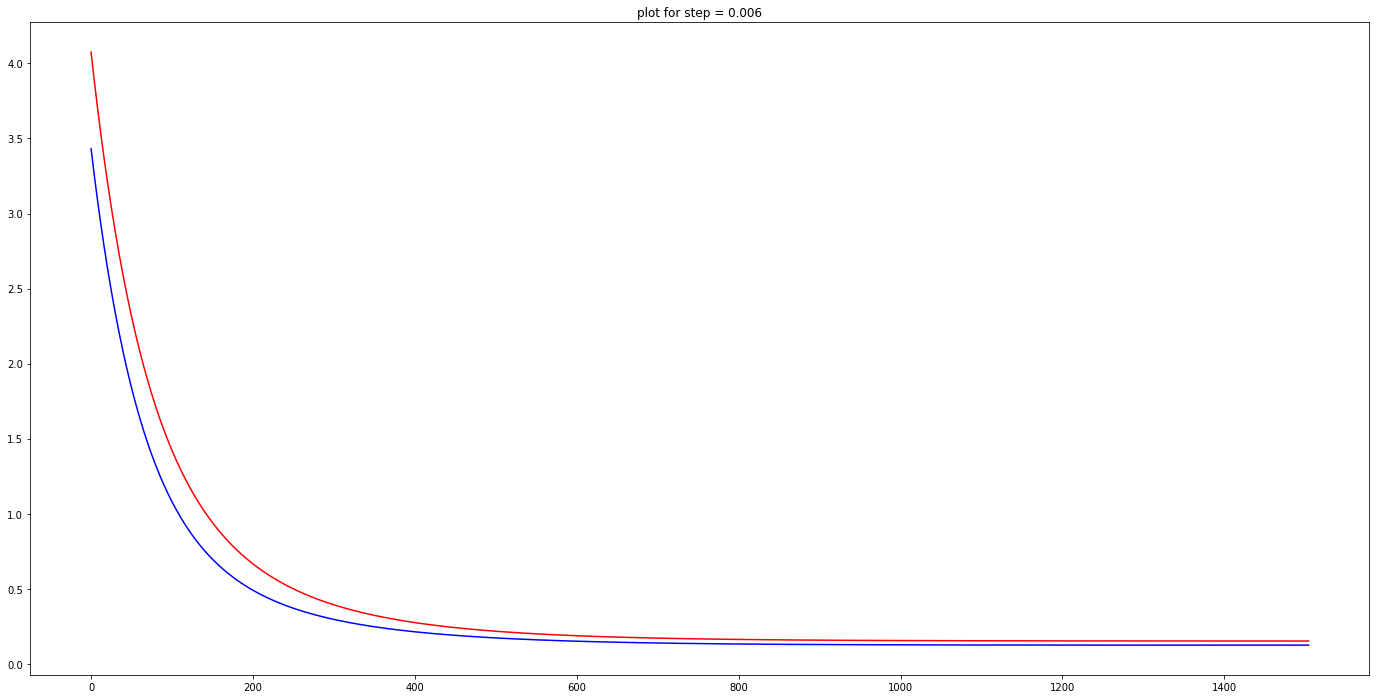

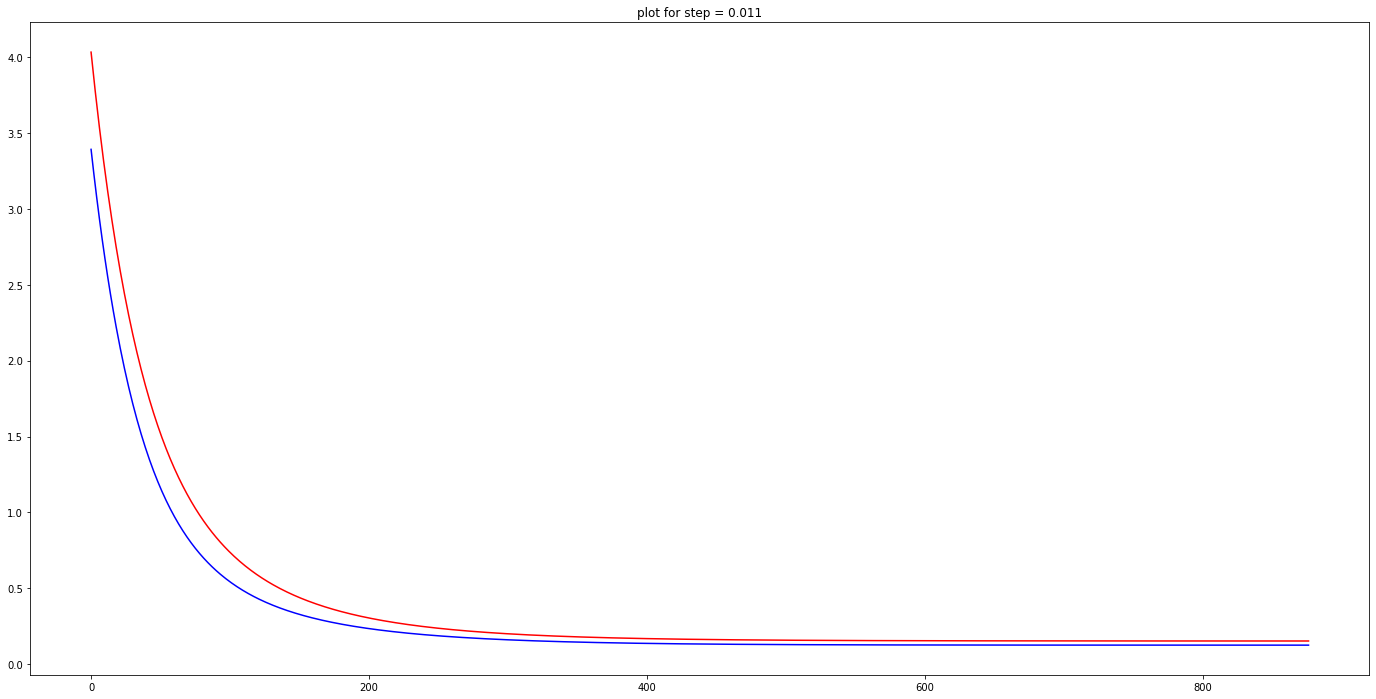

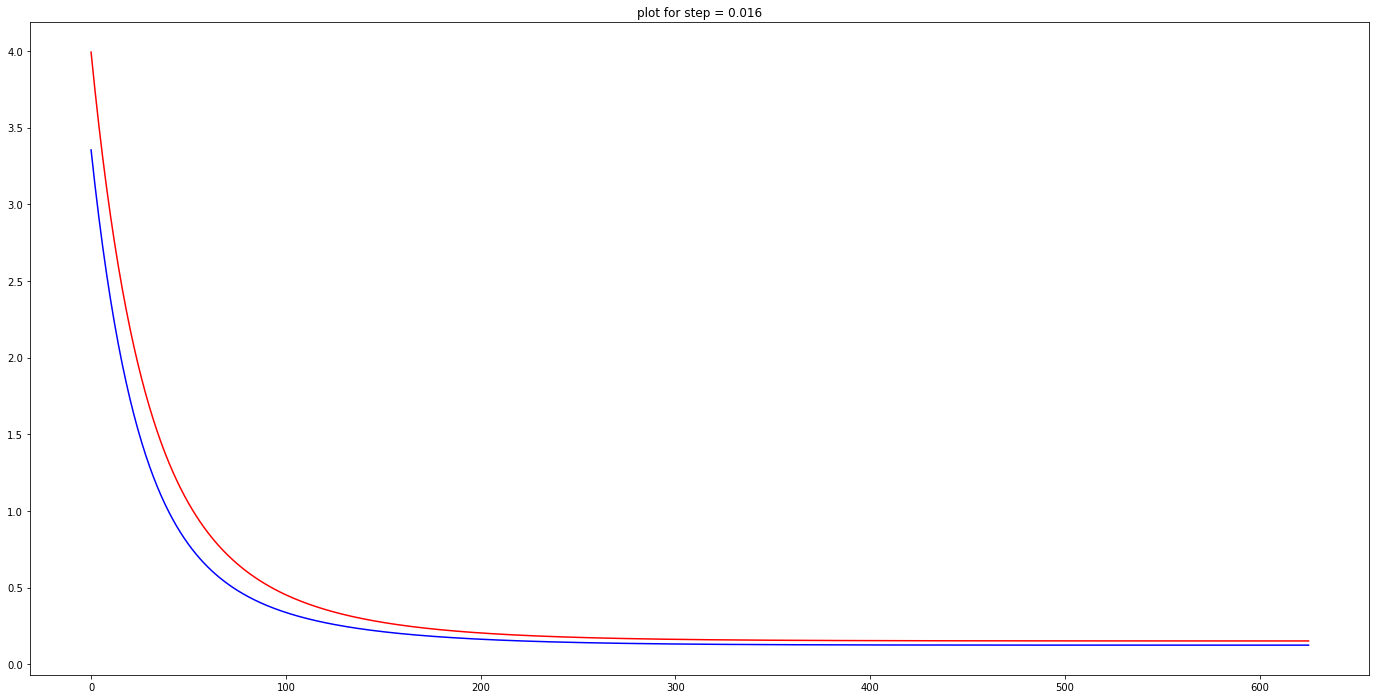

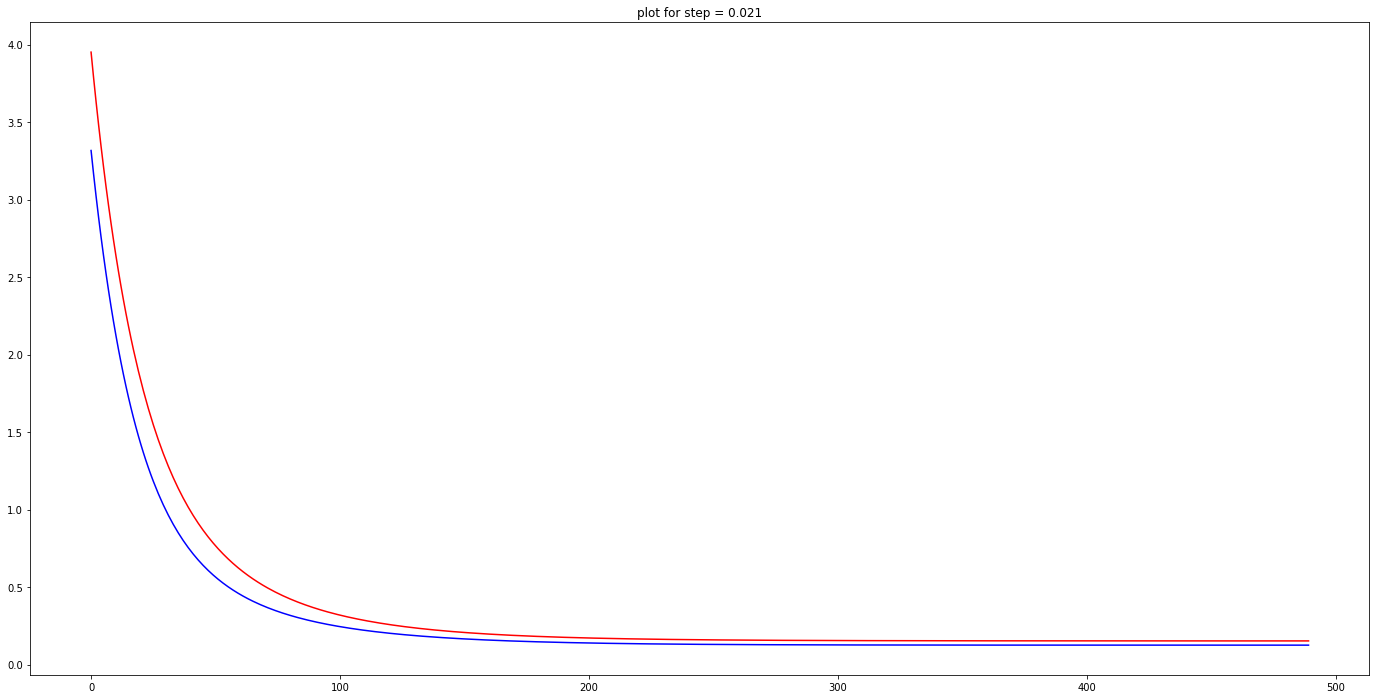

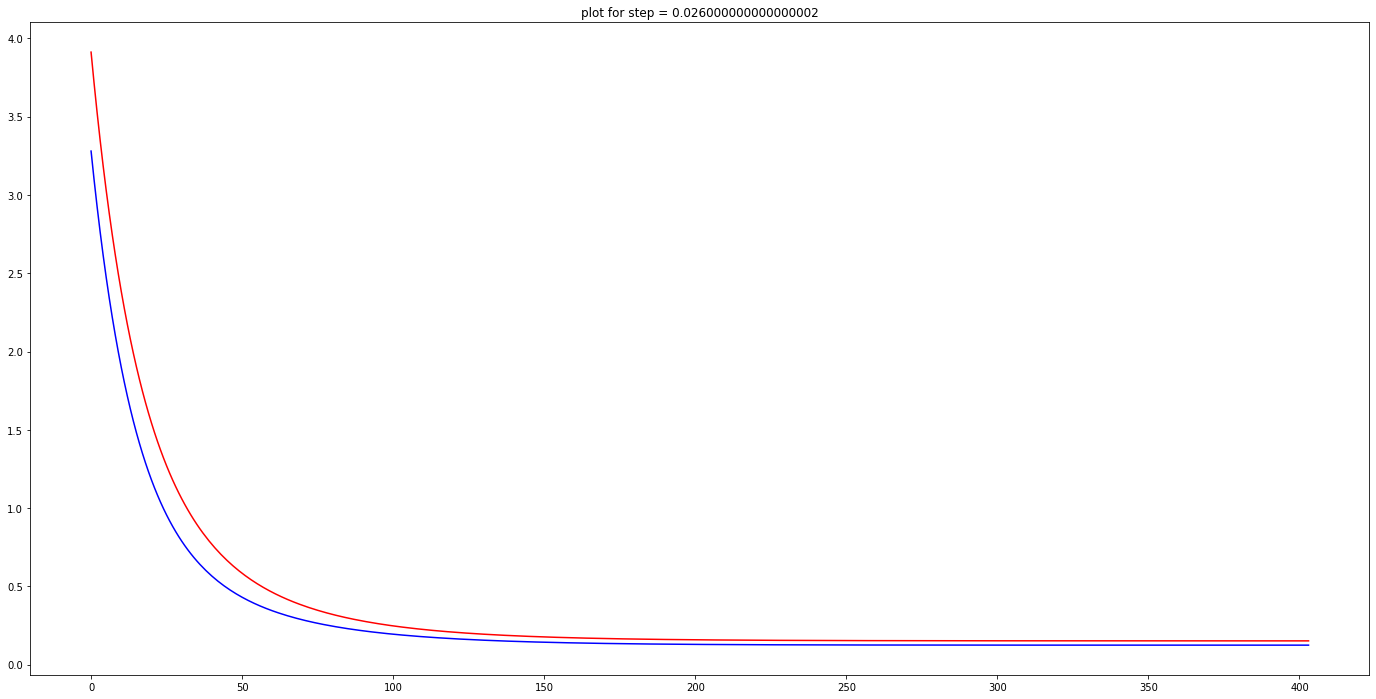

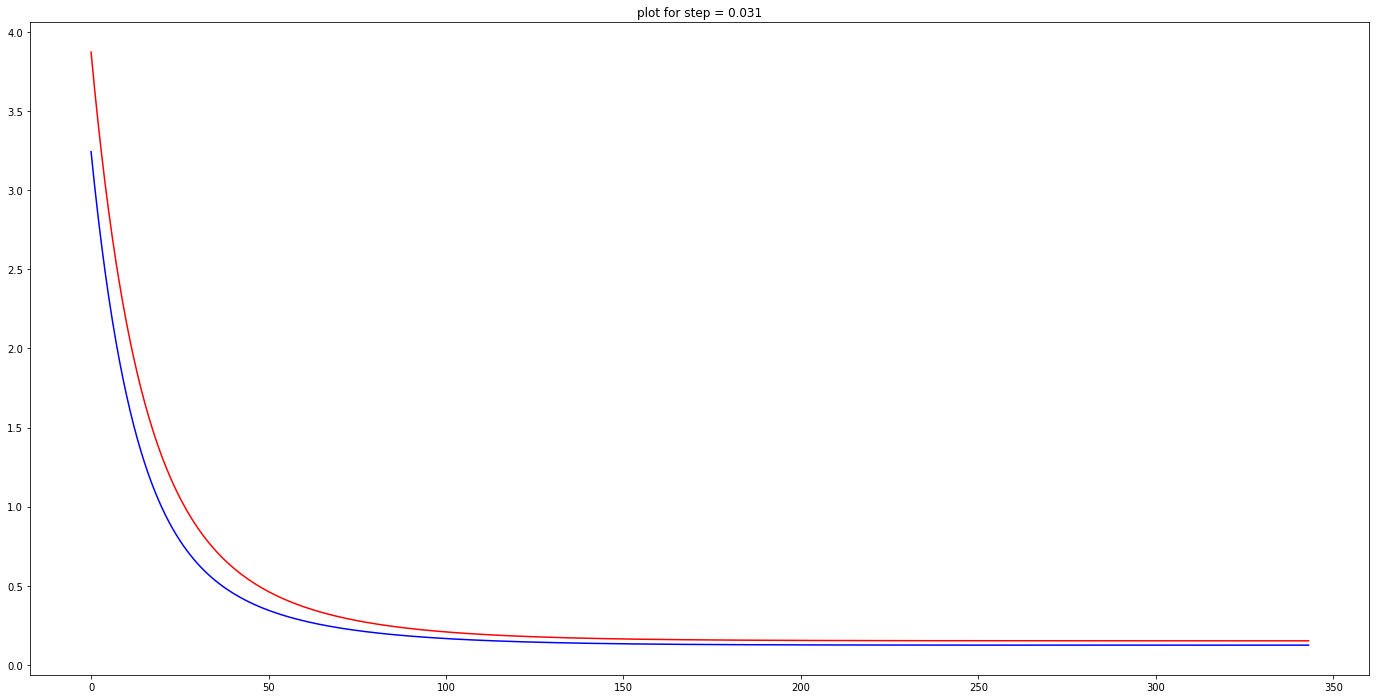

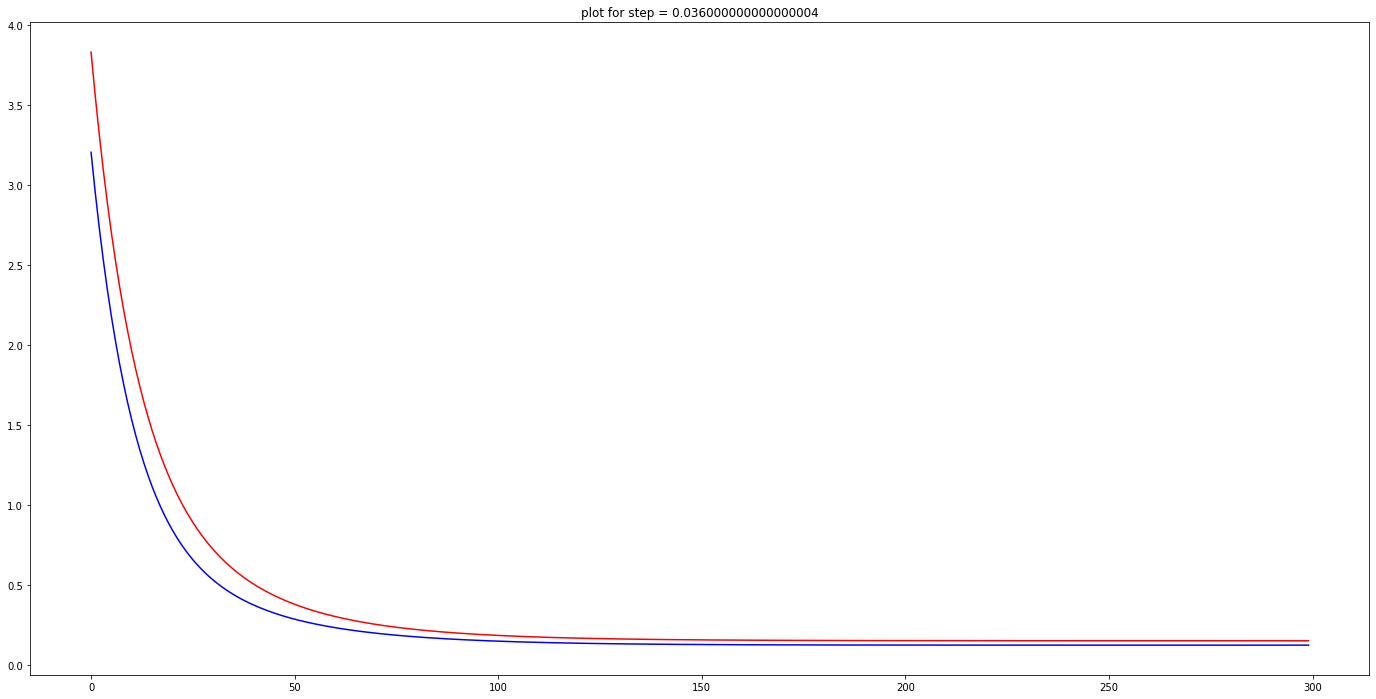

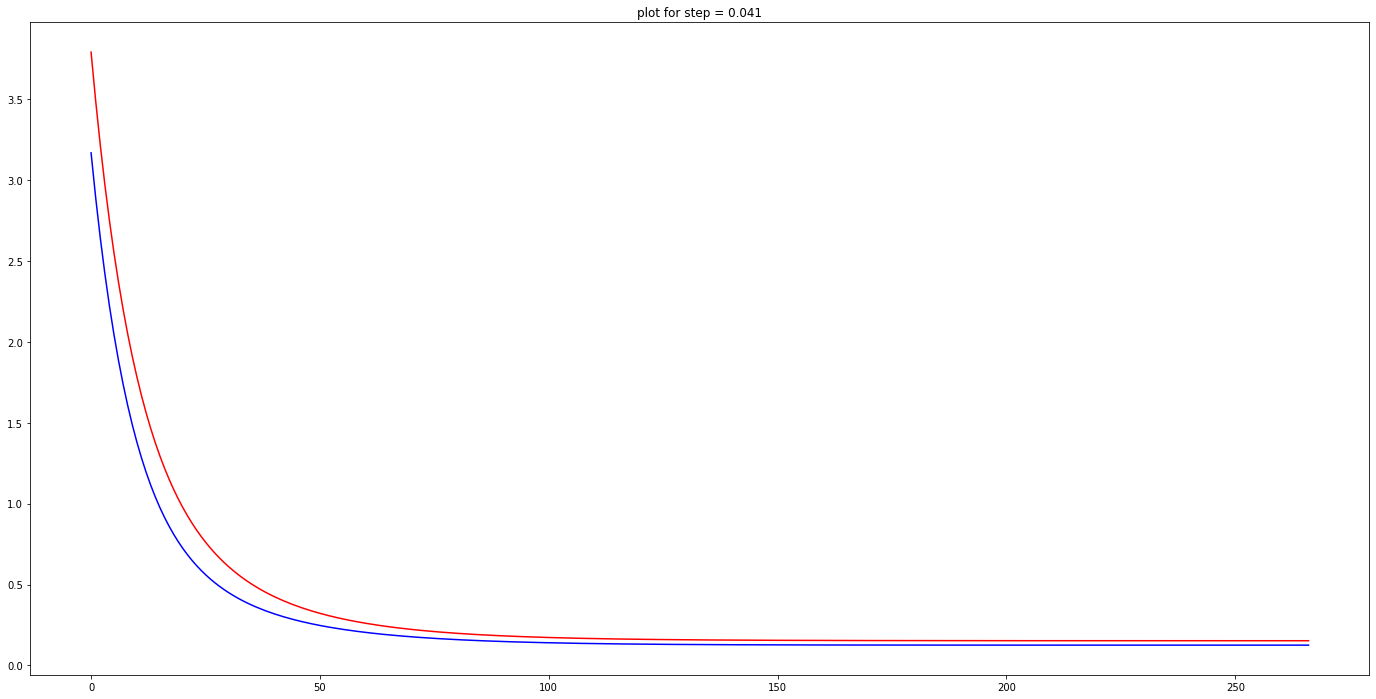

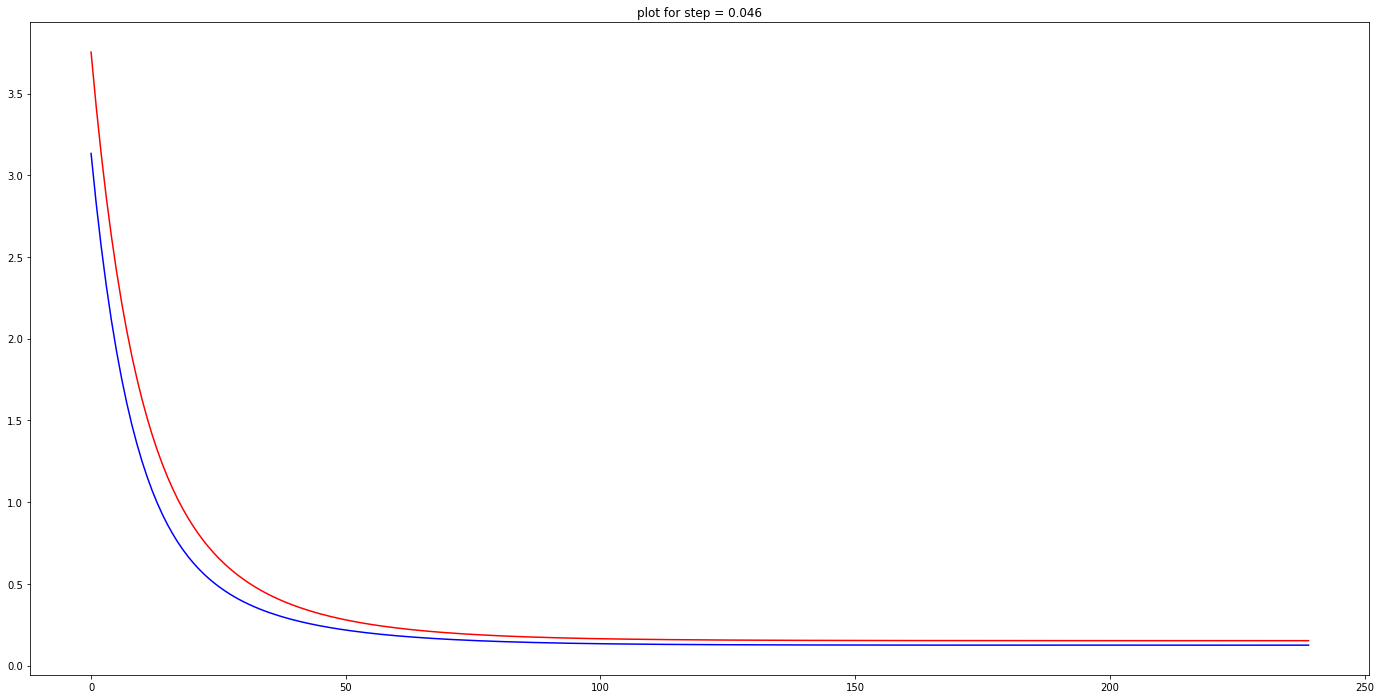

In [155]:
tune(X_train,y,X_test,y_test,W0,b0)

As we can see step sizes from the range [0.03,0.05] converge and give error around 0.152 and thus our model is highly accurate. We can see that optimal step size has increased by around a factor of 10

